# TABLE OF CONTENTS

* [Identify relevant directories and install](#IDENTIFY-DIRECTORIES-AND-INSTALL)
* [Imports](#IMPORTS)
* [Read forecasts](#READ-FORECASTS-FROM-COVID-HUB)
* [Scoreboard for Weekly Incidental cases](#BUILD-SCOREBOARD-FOR-INCIDENTAL-CASES)
* [Scoreboard for Cumulative Deaths](#BUILD-SCOREBOARD-FOR-CUMULATIVE-DEATHS)
* [Get weighted and unweighted ensemble forecasts](#Get-weighted-and-unweighted-model-forecasts)
    * [Unweighted](#UNWEIGHTED-FORECASTING)
    * [Weighted](#SCORE-WEIGHTED-FORECASTING)
* [Analysis of scores](#ANALYSIS-OF-SCORES)
    * [By date forecasts were made](#Plots-by-date-forecast-made)
    * [By target end date](#Plots-by-target-end-date)

# IDENTIFY DIRECTORIES AND INSTALL

In [1]:
#PLEASE CHANGE 'covidhubdir' TO YOUR OWN ???/???/???/covid19-forecast-hub/data-processed
from pathlib import Path
import os
covidhubdir = '/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed'
mypwd = !pwd
gitdir = str(Path(mypwd[0]).parent)
figuresdirectory = gitdir + '/' + 'Figures'

In [2]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


In [3]:
!pip install --upgrade -e .

Obtaining file:///home/osman.yogurtcu/Documents/Projects/Python/Scoreboard


  Attempting uninstall: Scoreboard
    Found existing installation: Scoreboard 0.4
    Uninstalling Scoreboard-0.4:
      Successfully uninstalled Scoreboard-0.4
  Running setup.py develop for Scoreboard


In [4]:
os.chdir(mypwd[0])

In [5]:
!pwd

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Notebooks


# IMPORTS

In [6]:
import Scoreboard19 as S19
from tqdm import tqdm
import scipy.interpolate
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pl
import matplotlib.dates as mdates
import shutil
import glob

# READ FORECASTS FROM COVID HUB

In [7]:
newPath = shutil.copy('../Rcode/read_processed_dataONY.R', 
                      covidhubdir)
os.chdir(covidhubdir)

In [8]:
rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [9]:
cd ..

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub


In [10]:
# !git fetch origin
# !git reset --hard origin/master
!git pull

remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Total 105 (delta 82), reused 82 (delta 82), pack-reused 23
Receiving objects: 100% (105/105), 32.45 MiB | 39.51 MiB/s, done.
Resolving deltas: 100% (83/83), completed with 44 local objects.
From https://github.com/reichlab/covid19-forecast-hub
   04327b6f..ad5dbd55  master     -> origin/master
Updating 04327b6f..ad5dbd55
Updating files: 100% (34/34), done.
Fast-forward
 code/validation/locally_validated_files.csv        |      7 +
 code/validation/validated_files.csv                |      7 +
 code/zoltar_scripts/validated_file_db.json         |      9 +-
 .../CU-nochange/2020-11-19-CU-nochange.csv         | 197617 +++++++++++++++++
 .../2020-11-19-CU-scenario_high.csv                | 197665 +++++++++++++++++
 .../CU-scenario_low/2020-11-19-CU-scenario_low.csv | 198193 ++++++++++++++++++
 .../CU-scenario_mid/2020-11-19-CU-scenario_mid.csv | 198145 +++++++++++++++++
 data-processed/CU-select/20

In [11]:
cd data-processed

/home/osman.yogurtcu/Documents/Projects/Python/covid19-forecast-hub/data-processed


In [12]:
#Read forecasts in COVID-19 Forecast Hub - this step takes some time
!Rscript read_processed_dataONY.R


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [13]:
files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.copy2(file, mypwd[0])

In [14]:
os.chdir(mypwd[0])

files = glob.iglob(os.path.join(os.getcwd(), "*.osf"))
for file in files:
    if os.path.isfile(file):
        shutil.move(os.path.join(os.getcwd(), file), os.path.join(gitdir + '/' + 'Data/', file))        

os.chdir(gitdir + '/' + 'Data/')        
outfilename = 'all_dataONY.csv'
find = 0
        
with open(outfilename, 'wb') as outfile:
    for filename in glob.glob('*.osf'):
        find += 1
        if filename == outfilename:
            # don't want to copy the output into the output
            continue
        with open(filename, 'rb') as readfile:
            if find != 1:
                readfile.readline()  # Throw away header on all but first file
            shutil.copyfileobj(readfile, outfile)        
            
os.chdir(mypwd[0])            

# BUILD SCOREBOARD

## BUILD SCOREBOARD FOR INCIDENTAL CASES

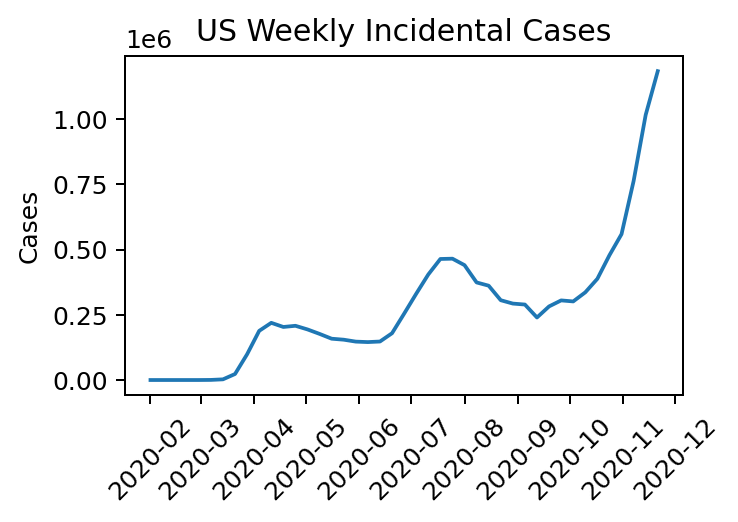

In [15]:
US_cases = S19.readobservedcases()
S19.plotUSIncCases(US_cases,figuresdirectory)

In [16]:
FirstForecasts = S19.getscoreboard(US_cases,'Case','../Data/ScoreboardCases.pkl')

100%|██████████| 2772/2772 [07:37<00:00,  6.06it/s]


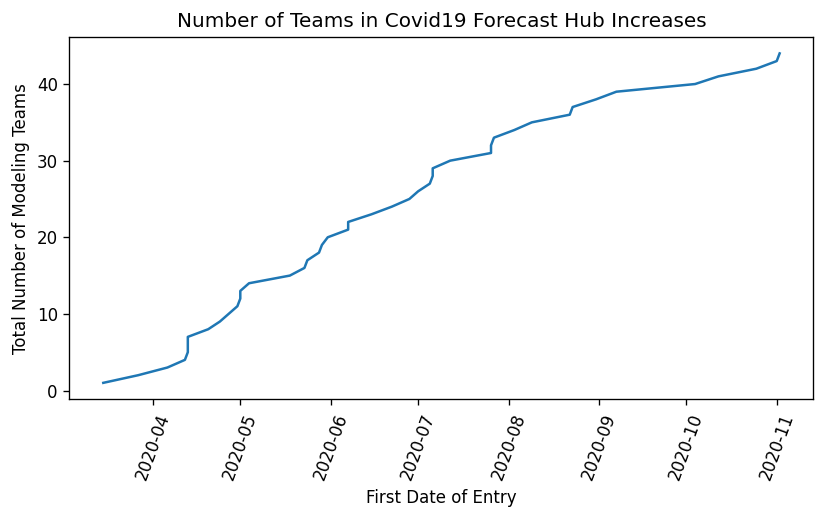

In [17]:
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
5.100556999891981
Unique models in the scoreboard:
0. COVIDhub:baseline
1. LANL:GrowthRate
2. IowaStateLW:STEM
3. Columbia_UNC:SurvCon
4. JHU_IDD:CovidSP
5. Covid19Sim:Simulator
6. UCLA:SuEIR
7. OliverWyman:Navigator
8. CovidAnalytics:DELPHI
9. USACE:ERDC_SEIR
10. RobertWalraven:ESG
11. UMich:RidgeTfReg
12. QJHong:Encounter
13. LNQ:ens1
14. IHME:CurveFit
15. COVIDhub:ensemble
16. Karlen:pypm
17. DDS:NBDS
18. CU:nochange
19. CU:scenario_high
20. CU:scenario_low
21. CU:scenario_mid
22. CU:select
23. CEID:Walk
24. JHUAPL:Bucky
25. BPagano:RtDriven
26. JHU_CSSE:DECOM
27. USC:SI_kJalpha_RF
28. JCB:PRM
Models in Scoreboard that are not yet in modeltypes.dat:
[]
Edit modeltypes.dat accordingly


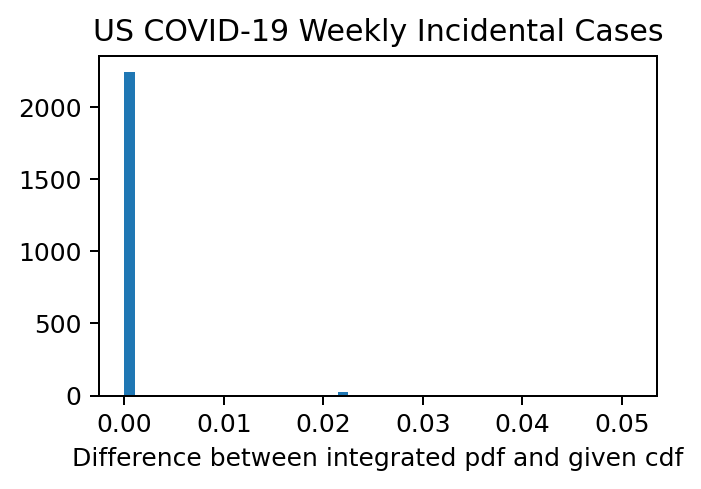

In [18]:
ScoreboardCases = pd.read_pickle('../Data/ScoreboardCases.pkl')
S19.plotdifferencescdfpdf(ScoreboardCases,'Case')
modeltypesCases = S19.getmodeltypes(ScoreboardCases)

In [19]:
%%capture cap --no-stderr
themodels = ScoreboardCases['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [20]:
#Writing out all the models in the scoreboard into a text file
with open('../INCCASE_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [21]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardCases[ScoreboardCases["proper"]==False].index
ScoreboardCases.drop(delete_row,inplace=True)
ScoreboardCases.reset_index(drop=True,inplace=True)

<Figure size 2400x1200 with 0 Axes>

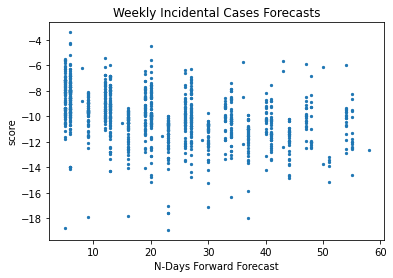

<Figure size 2400x1200 with 0 Axes>

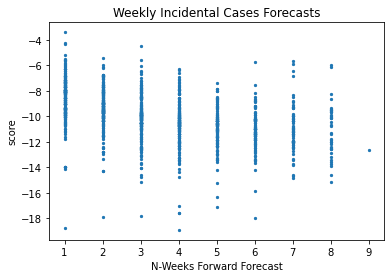

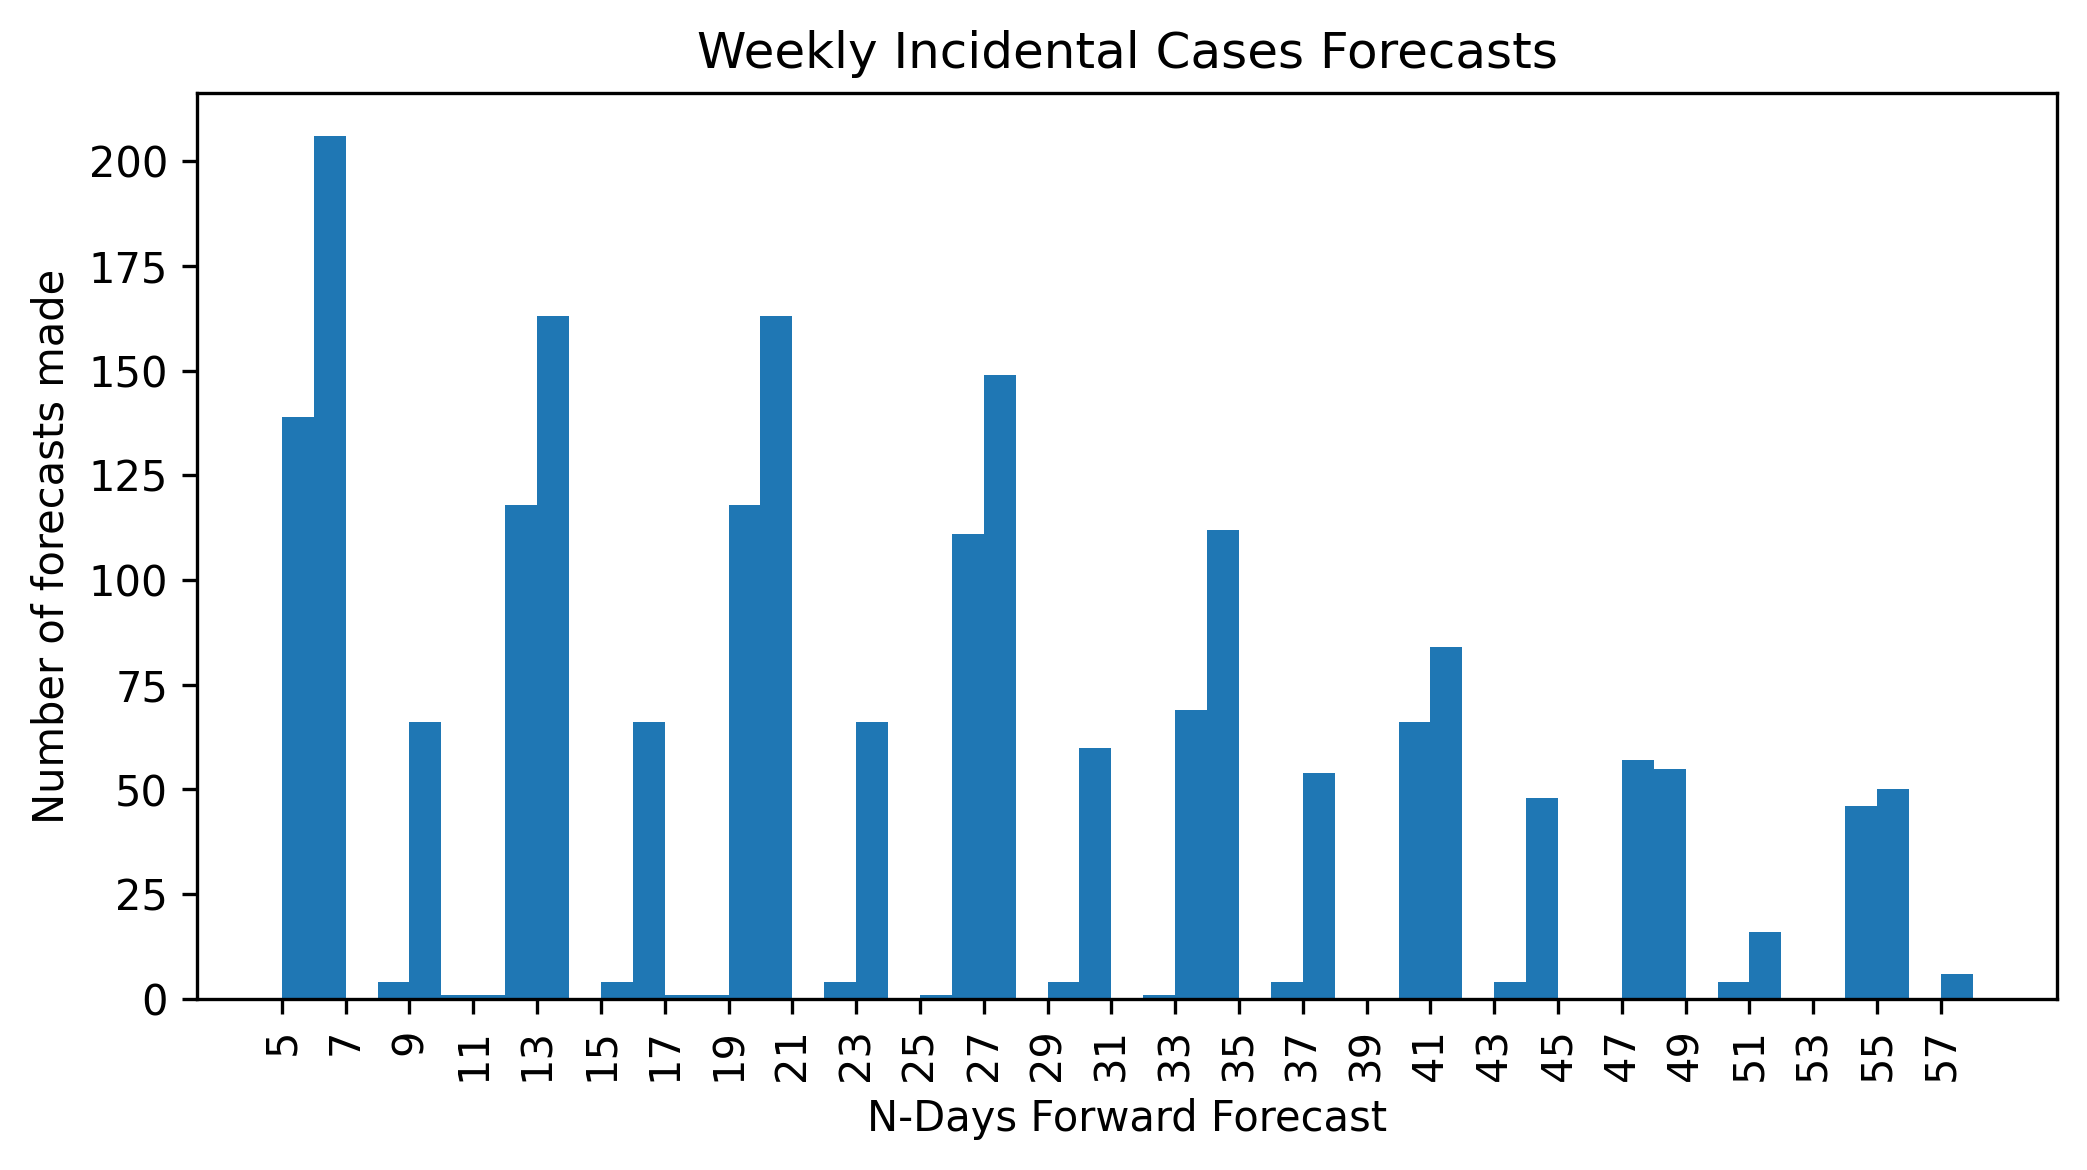

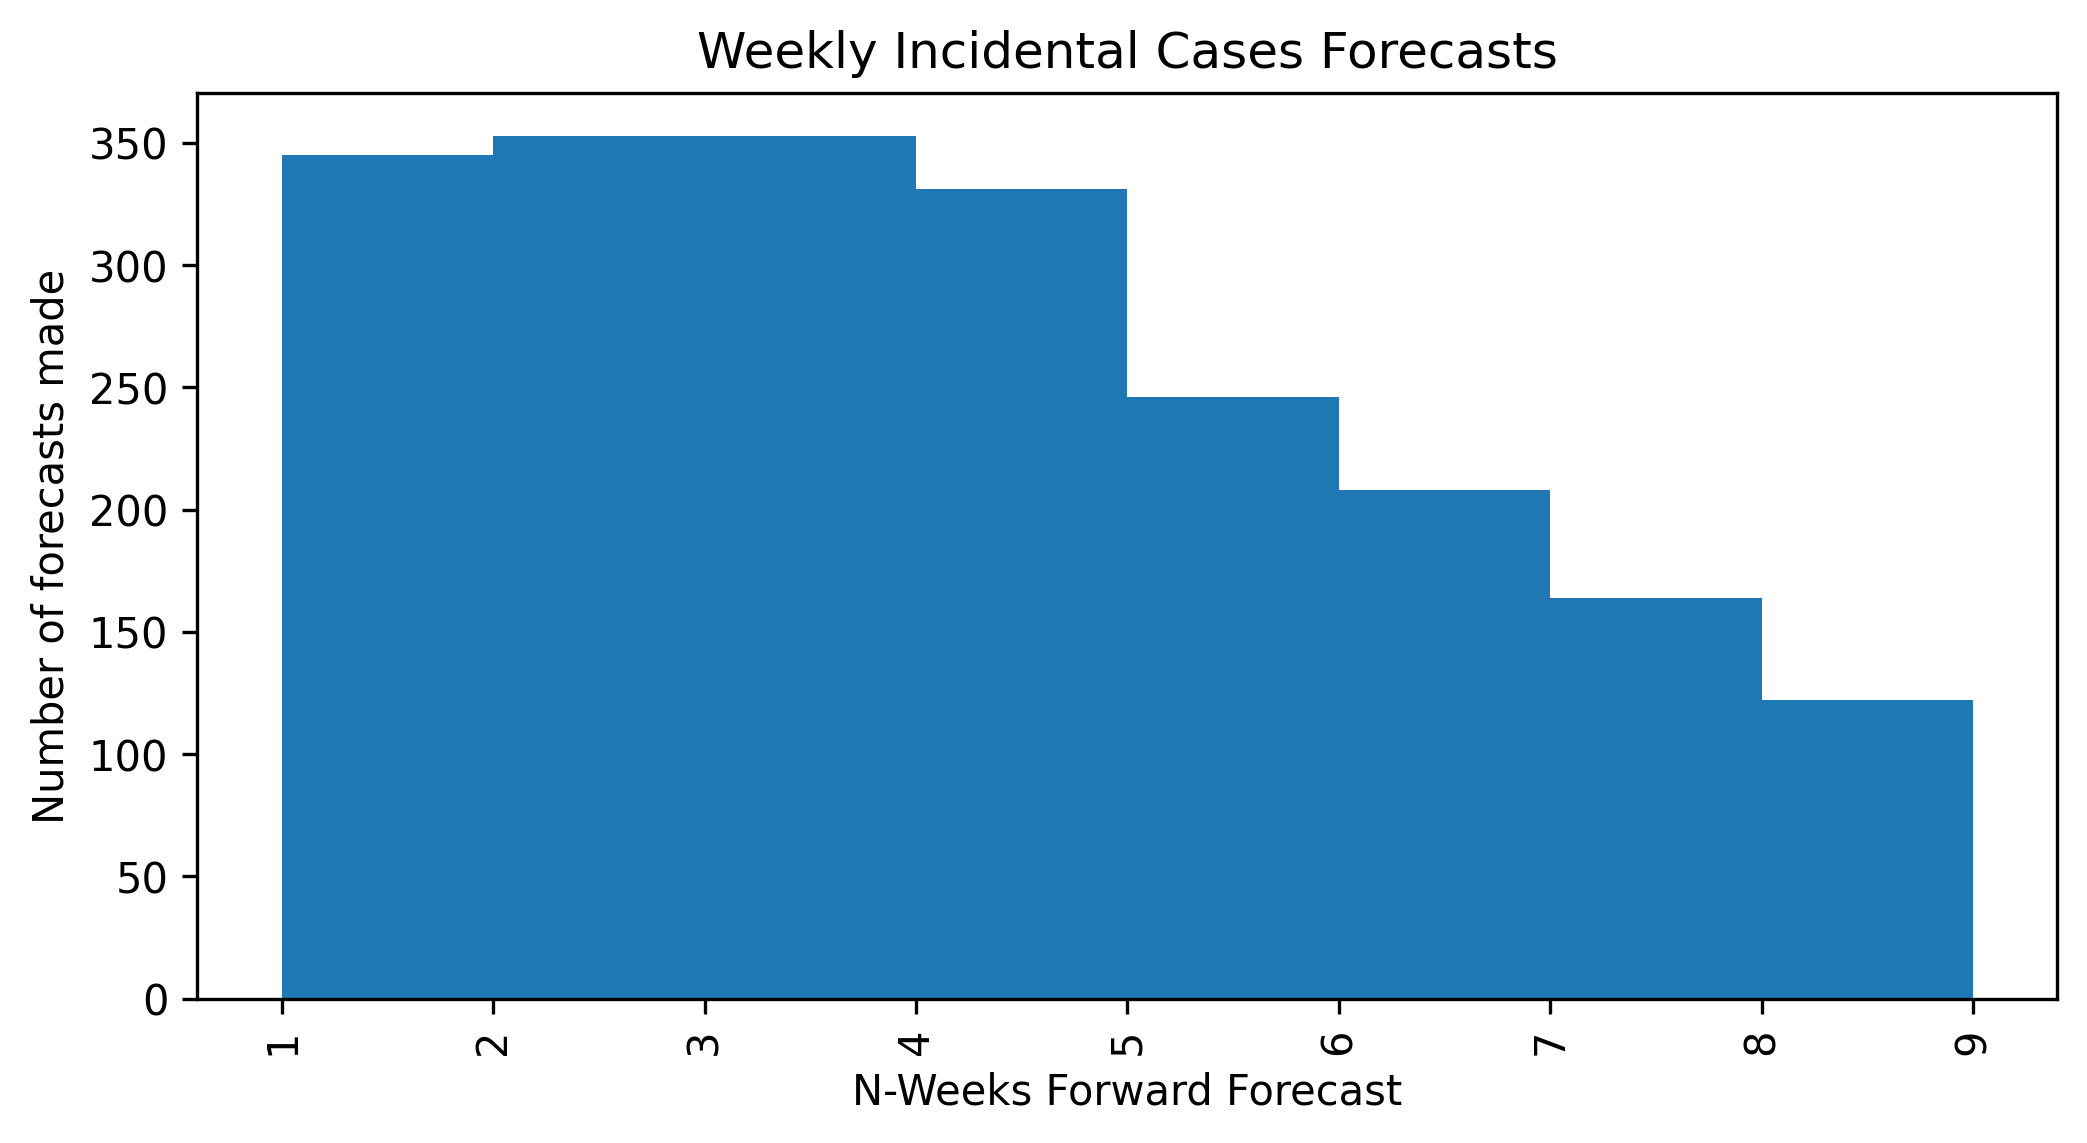

In [22]:
S19.plotallscoresdist(ScoreboardCases,figuresdirectory,'Case')

In [23]:
int(ScoreboardCases['deltaW'].max())

9

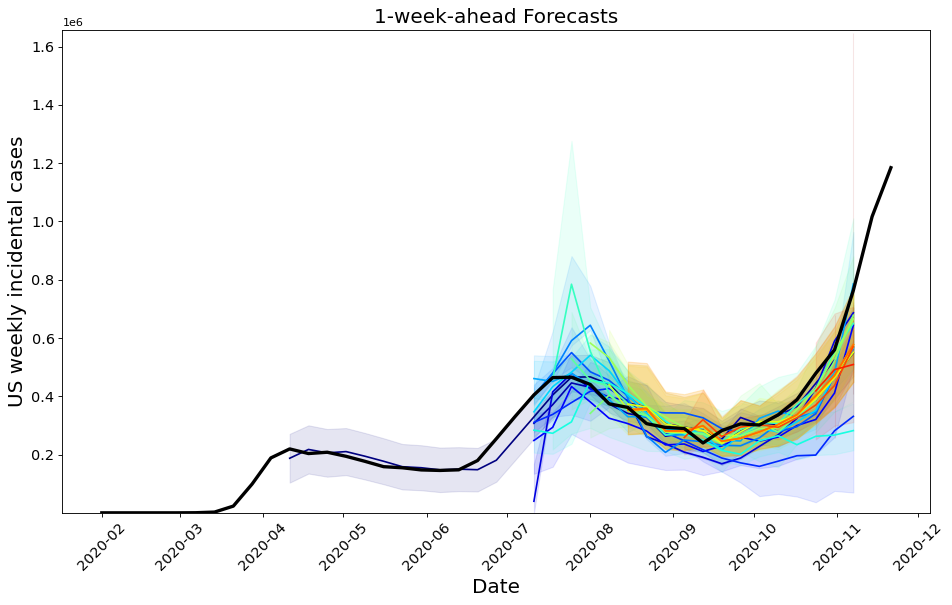

In [24]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',1)

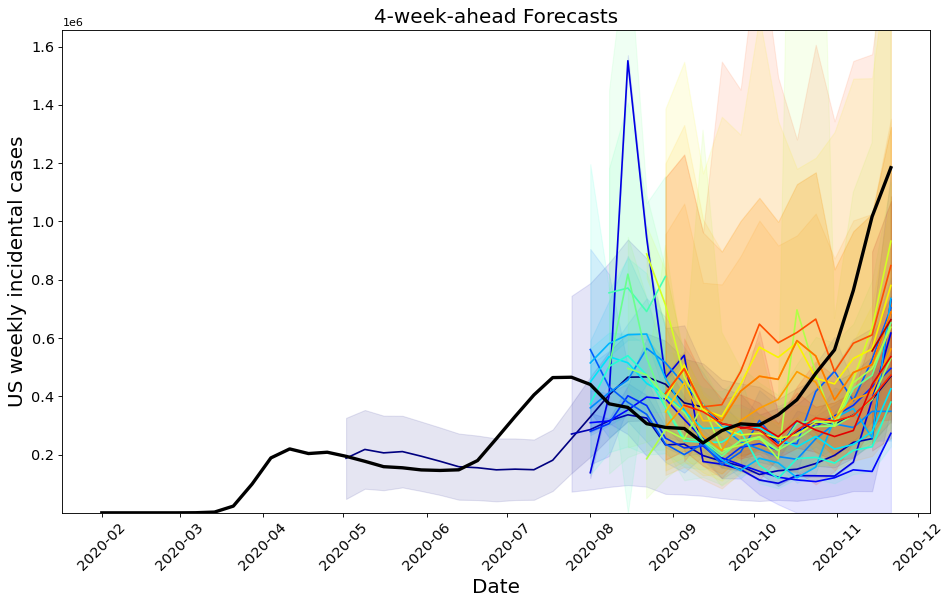

In [25]:
S19.plotlongitudinalALL(US_cases,ScoreboardCases,'Cases',4)

In [26]:
#ScoreboardDeaths[ScoreboardDeaths['model']=='BPagano:RtDriven']

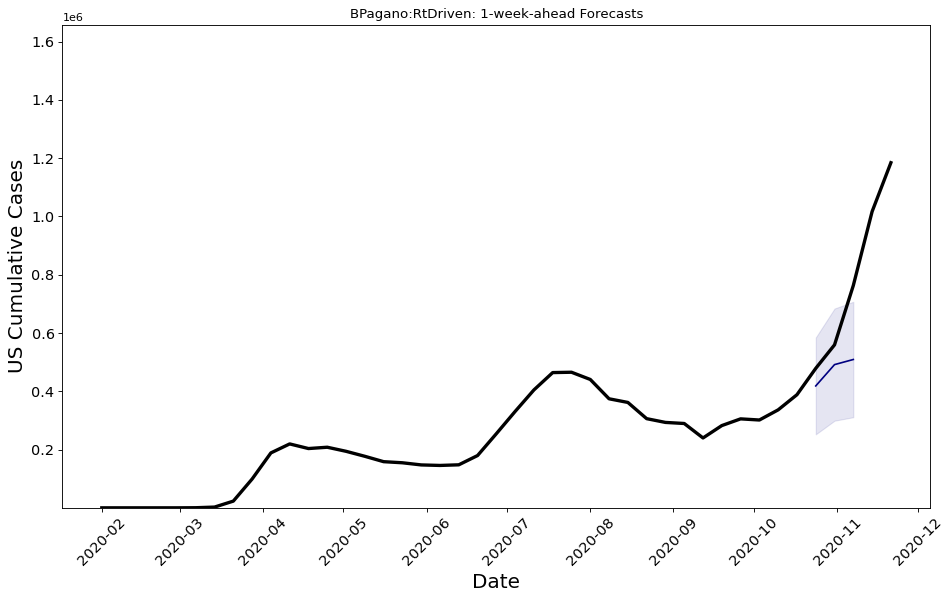

In [27]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'BPagano:RtDriven')

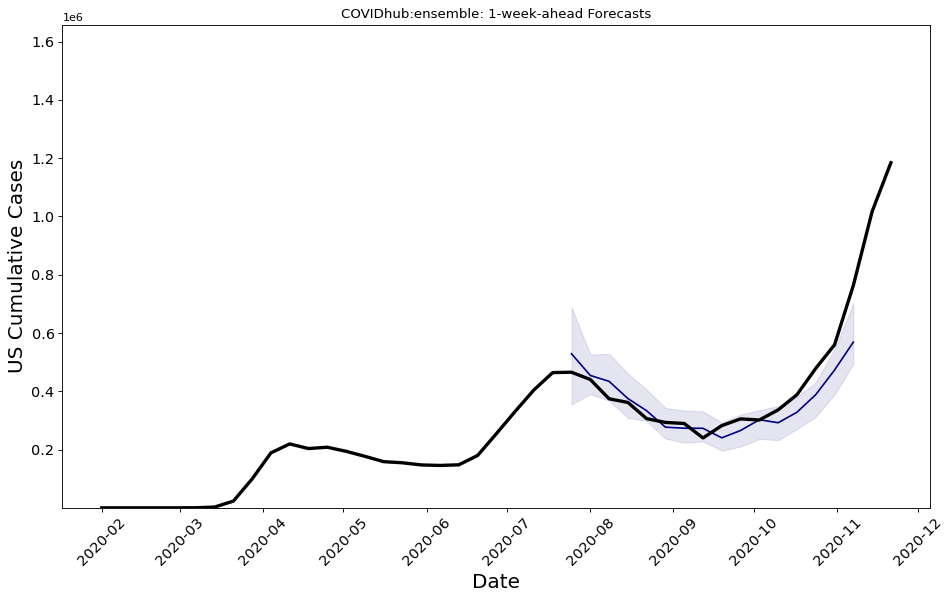

In [28]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:ensemble')

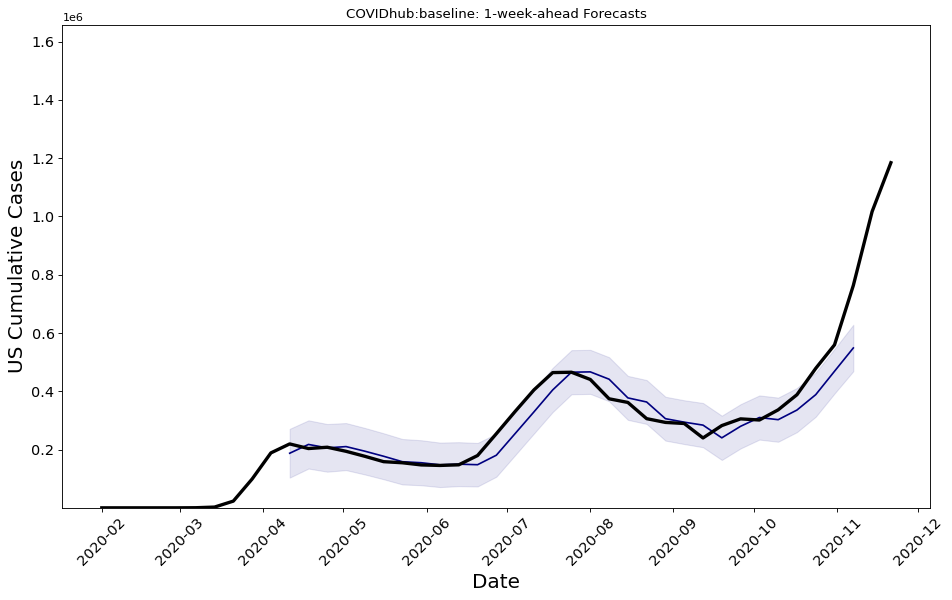

In [29]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'COVIDhub:baseline')

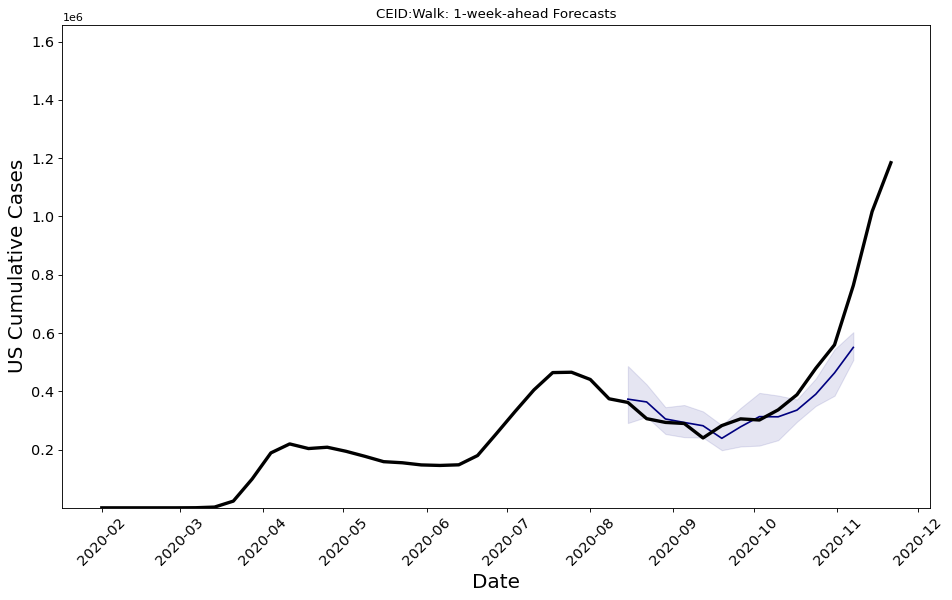

In [30]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',1,'CEID:Walk')

## BUILD SCOREBOARD FOR CUMULATIVE DEATHS

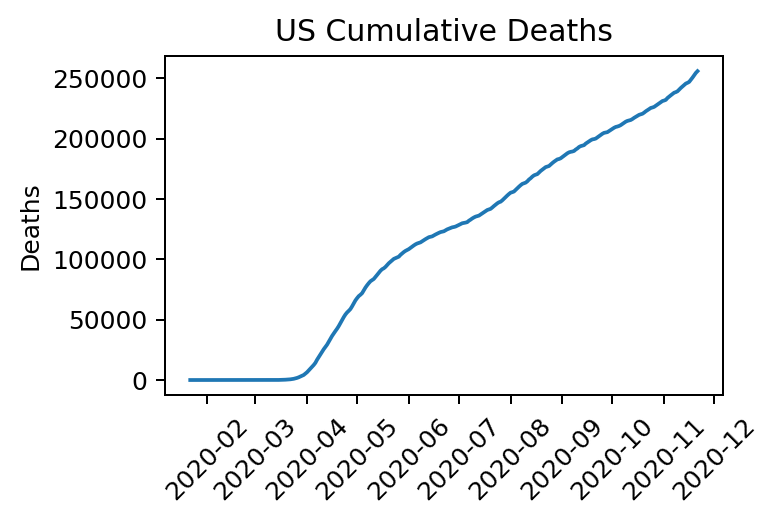

In [31]:
US_deaths = S19.readobserveddeaths()
S19.plotUSCumDeaths(US_deaths,figuresdirectory)

In [32]:
FirstForecasts = S19.getscoreboard(US_deaths,'Death','../Data/ScoreboardDeaths.pkl')

100%|██████████| 7694/7694 [03:33<00:00, 36.02it/s] 


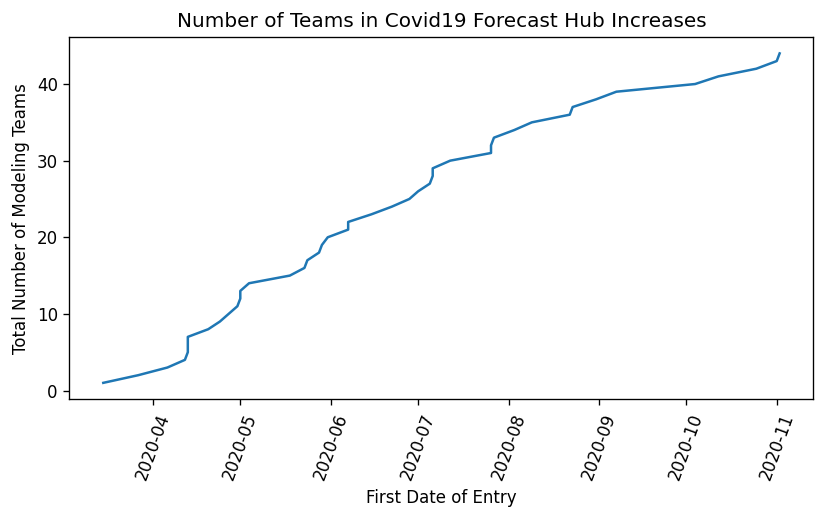

In [33]:
S19.numberofteamsincovidhub(FirstForecasts,figuresdirectory)

/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Maximum % conversion error:
2.5793983820063593
Unique models in the scoreboard:
0. Imperial:ensemble2
1. Imperial:ensemble1
2. IHME:CurveFit
3. COVIDhub:baseline
4. CU:select
5. CU:scenario_mid
6. CU:scenario_low
7. CU:scenario_high
8. CU:nochange
9. COVIDhub:ensemble
10. MOBS:GLEAM_COVID
11. UMass:ExpertCrowd
12. YYG:ParamSearch
13. UT:Mobility
14. JHU_IDD:CovidSP
15. LANL:GrowthRate
16. CovidAnalytics:DELPHI
17. IowaStateLW:STEM
18. UCLA:SuEIR
19. GT:DeepCOVID
20. UMass:MechBayes
21. PSI:DRAFT
22. UA:EpiCovDA
23. Covid19Sim:Simulator
24. USACE:ERDC_SEIR
25. SWC:TerminusCM
26. Auquan:SEIR
27. CovidActNow:SEIR_CAN
28. OliverWyman:Navigator
29. epiforecasts:ensemble1
30. NotreDame:mobility
31. MITCovAlliance:SIR
32. QJHong:Encounter
33. Columbia_UNC:SurvCon
34. UMich:RidgeTfReg
35. RobertWalraven:ESG
36. UCM_MESALab:FoGSEIR
37. Karlen:pypm
38. DDS:NBDS
39. RPI_UW:Mob_Collision
40. CEID:Walk
41. LNQ:ens1
42. WalmartLabsML:LogForecasting
43. SteveMcConnell:CovidComplete
44. JHUAPL:Bucky
4

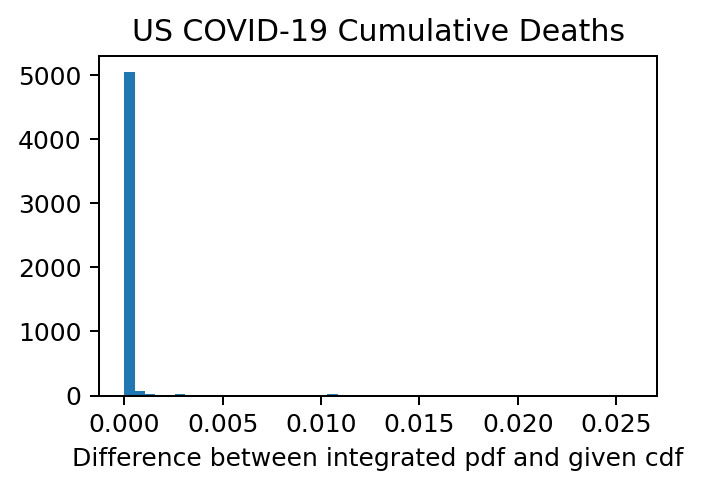

In [34]:
ScoreboardDeaths = pd.read_pickle('../Data/ScoreboardDeaths.pkl')
S19.plotdifferencescdfpdf(ScoreboardDeaths,'Death')
modeltypesDeaths = S19.getmodeltypes(ScoreboardDeaths)

In [35]:
%%capture cap --no-stderr
themodels = ScoreboardDeaths['model'].unique()
for i in range(0,len(themodels)):
    print(themodels[i])

In [36]:
#Writing out all the models in the scoreboard into a text file
with open('../CUMDEATH_Models.txt', 'w') as f:
    f.write(cap.stdout)

In [37]:
#Eliminate scores that do not have the proper score quantiles
delete_row = ScoreboardDeaths[ScoreboardDeaths["proper"]==False].index
ScoreboardDeaths.drop(delete_row,inplace=True)
ScoreboardDeaths.reset_index(drop=True,inplace=True)

<Figure size 2400x1200 with 0 Axes>

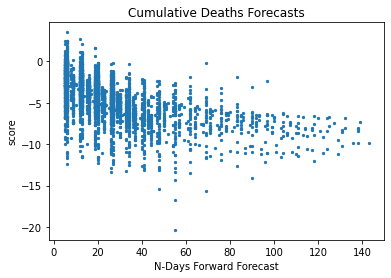

<Figure size 2400x1200 with 0 Axes>

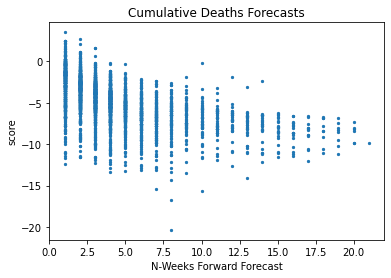

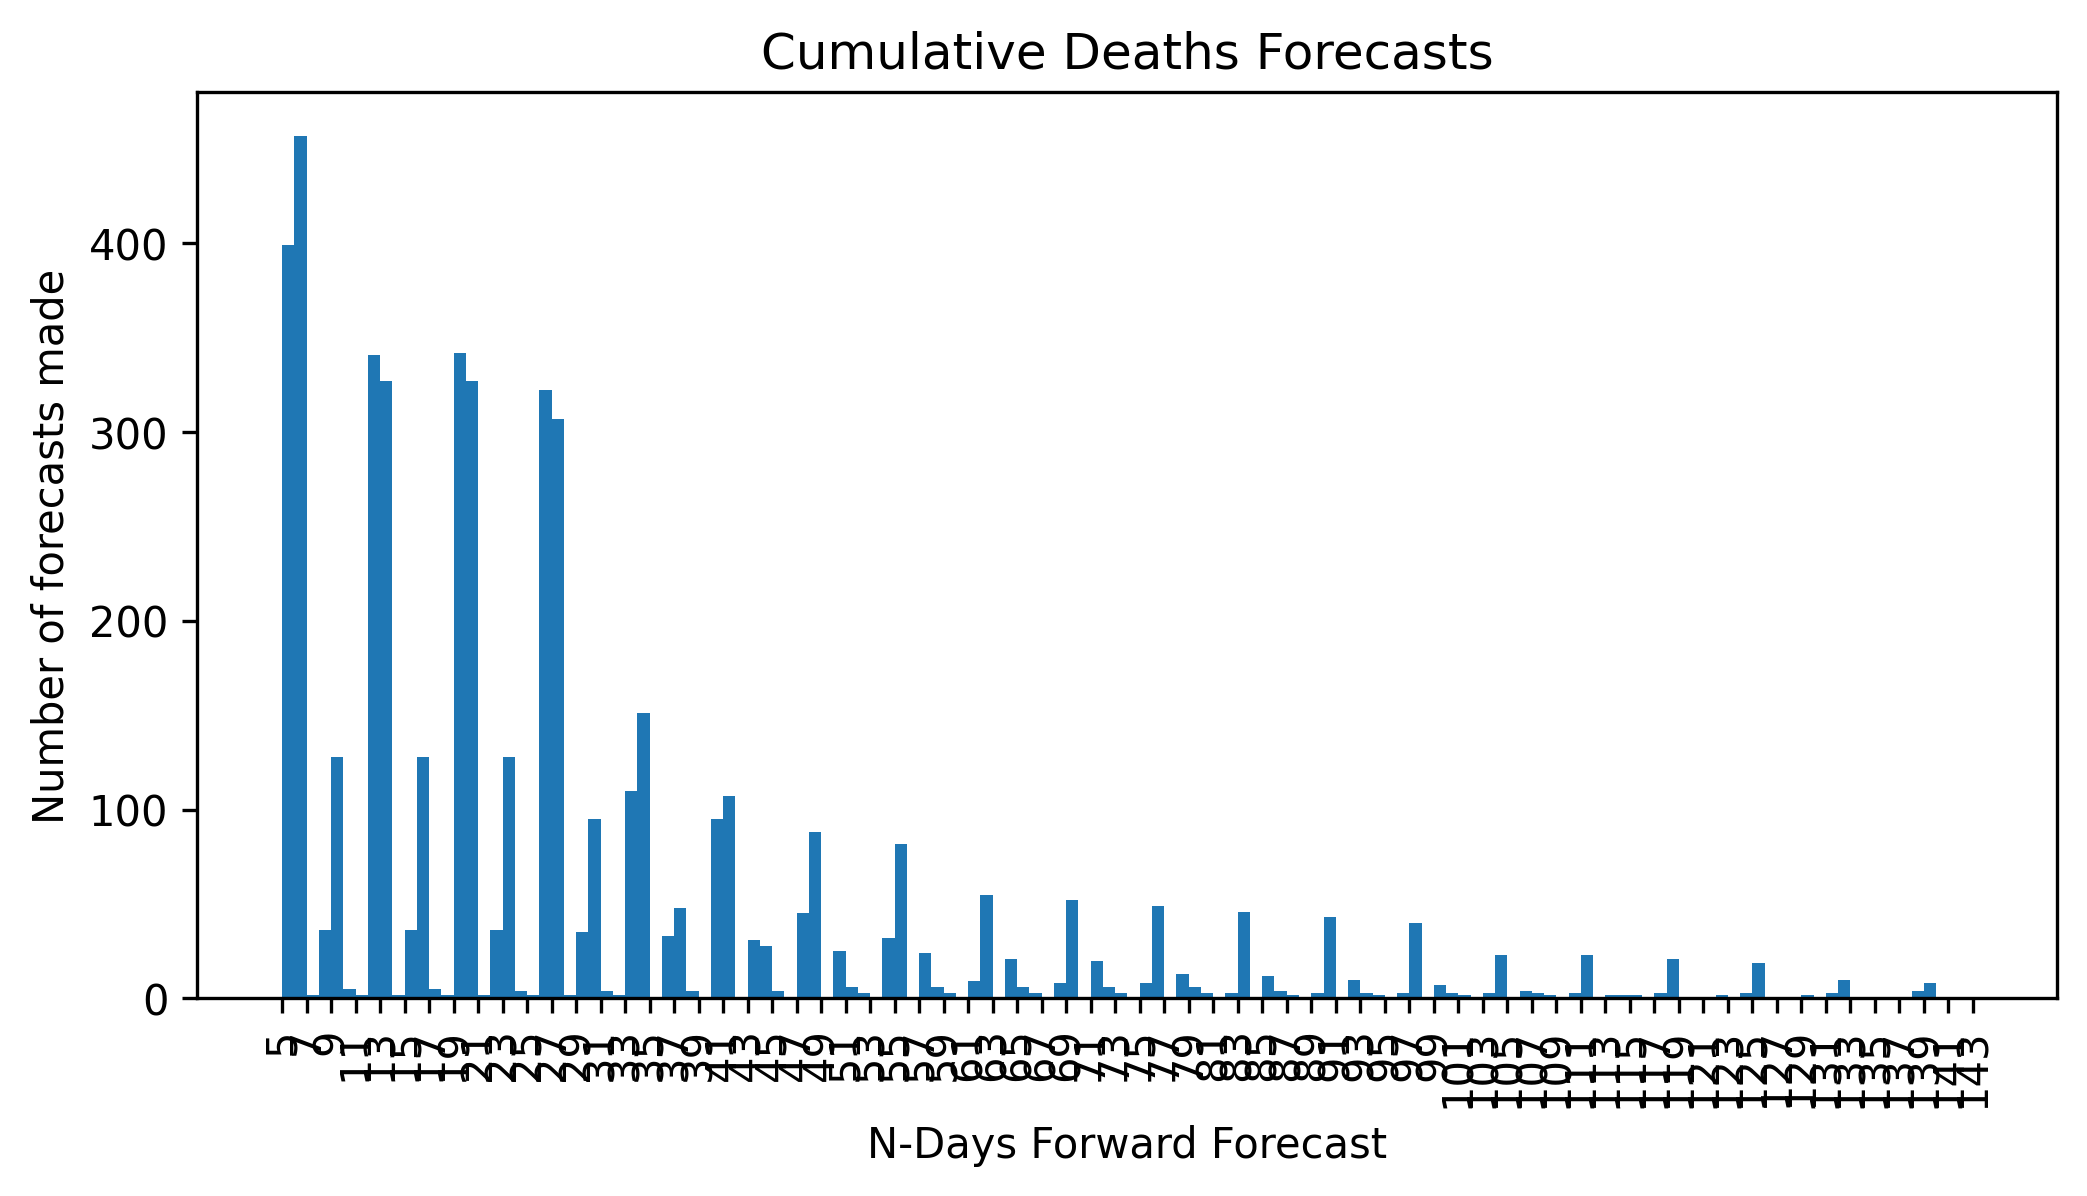

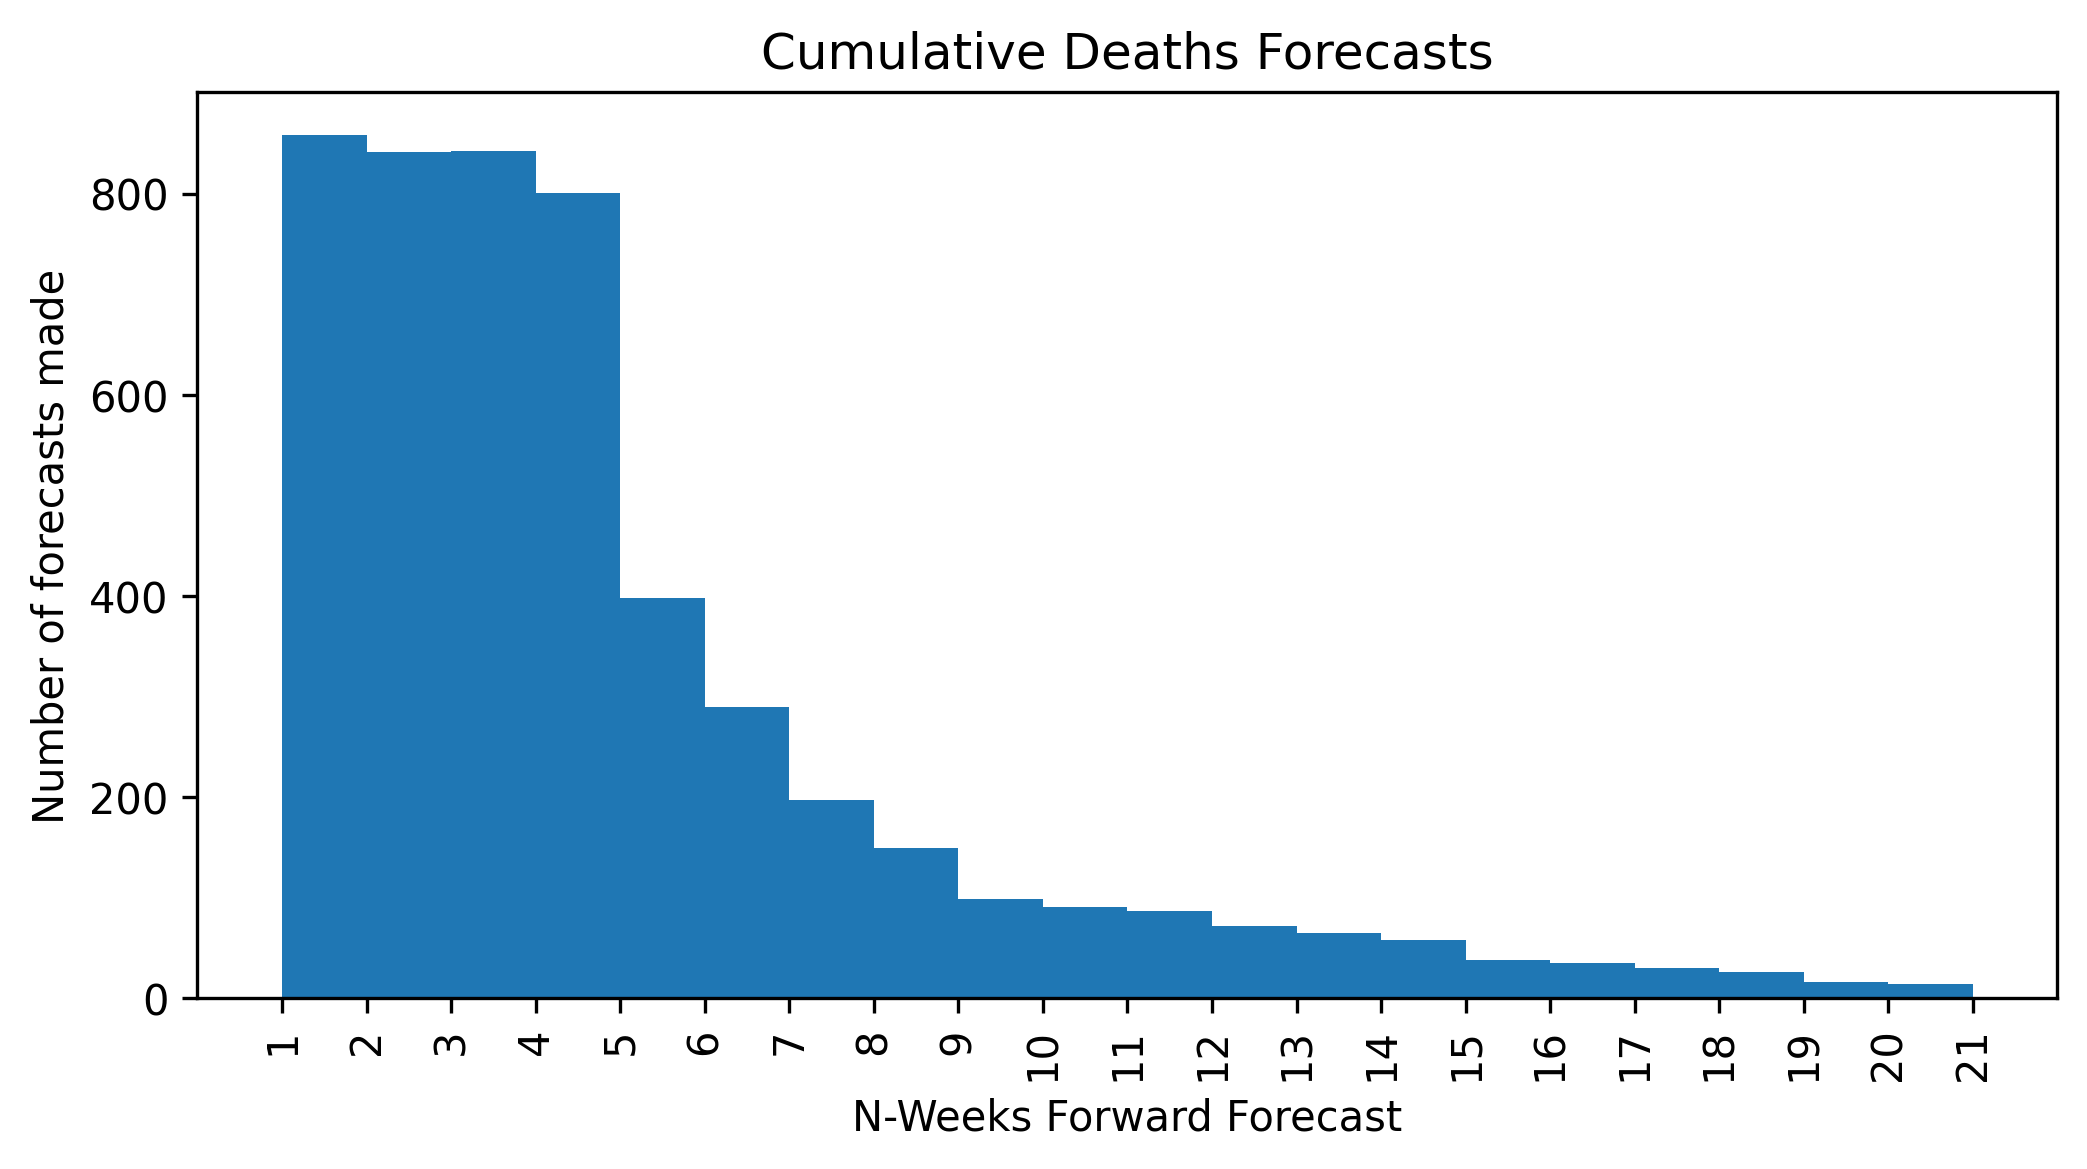

In [38]:
S19.plotallscoresdist(ScoreboardDeaths,figuresdirectory,'Death')

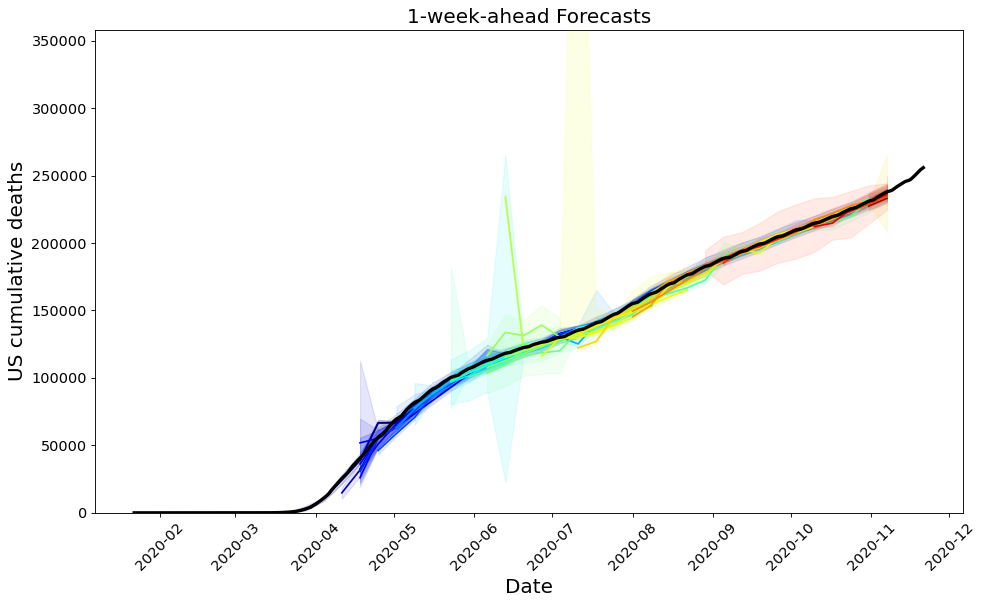

In [39]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',1)

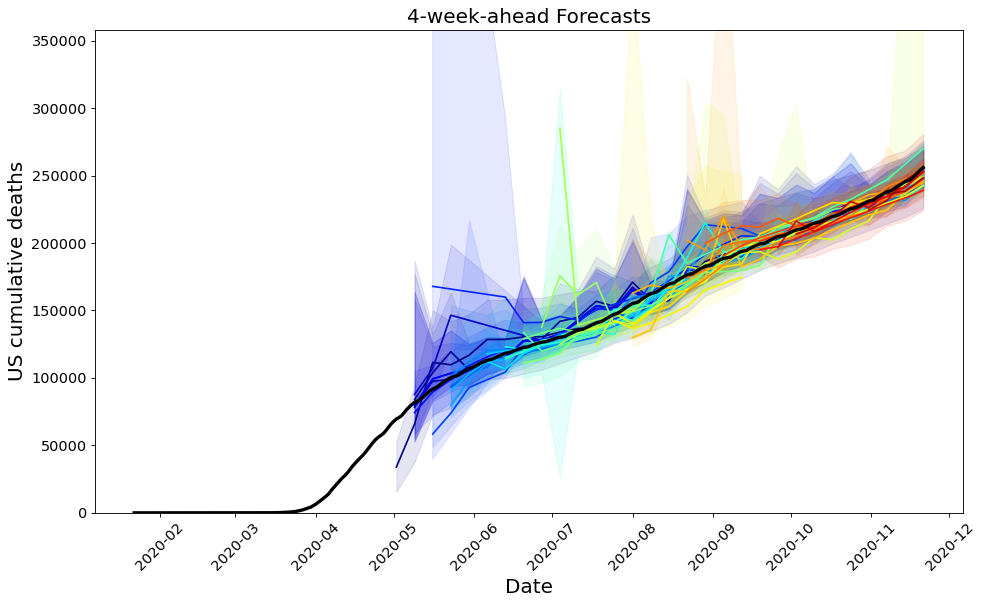

In [40]:
S19.plotlongitudinalALL(US_deaths,ScoreboardDeaths,'Deaths',4)

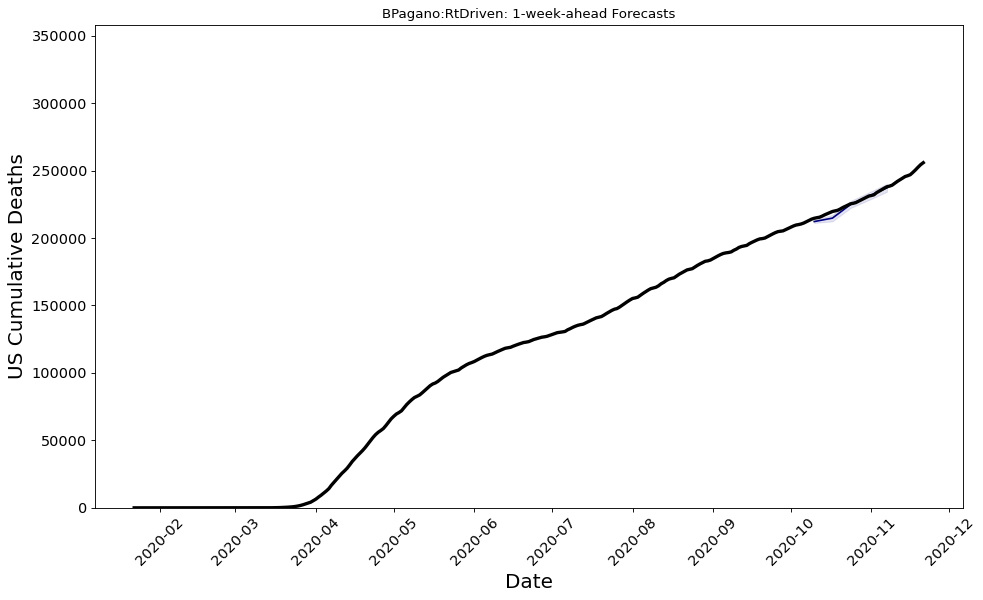

In [41]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'BPagano:RtDriven')

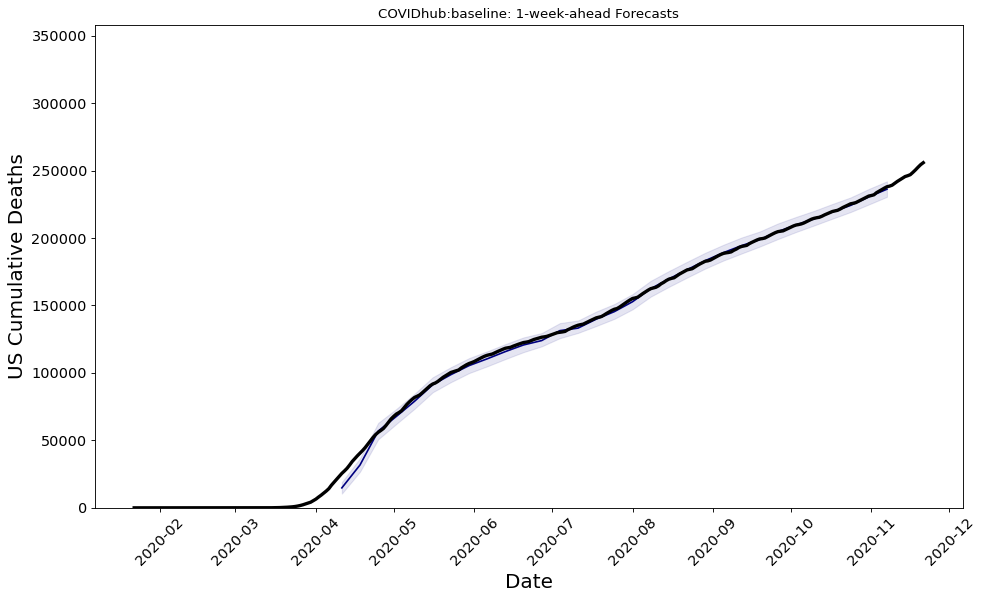

In [42]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',1,'COVIDhub:baseline')

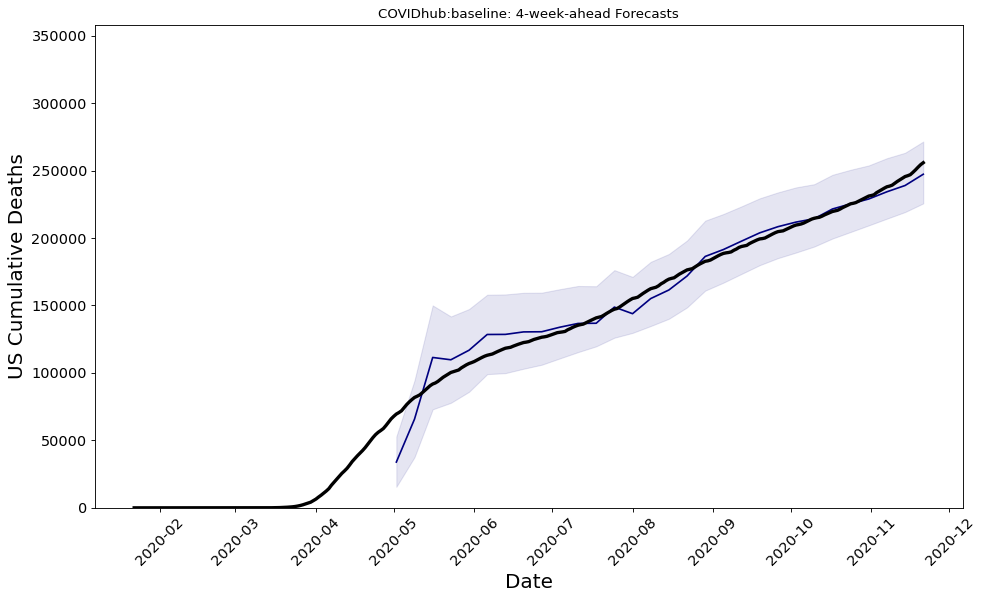

In [43]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:baseline')

# Get weighted and unweighted model forecasts

In [44]:
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'weighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'weighted')
ScoreboardCases = S19.getweightedmodelalldates(ScoreboardCases,'2020-08-01','Cases',4,'unweighted')
ScoreboardDeaths = S19.getweightedmodelalldates(ScoreboardDeaths,'2020-08-01','Deaths',4,'unweighted')

100%|██████████| 34/34 [00:00<00:00, 12756.63it/s]


# UNWEIGHTED FORECASTING

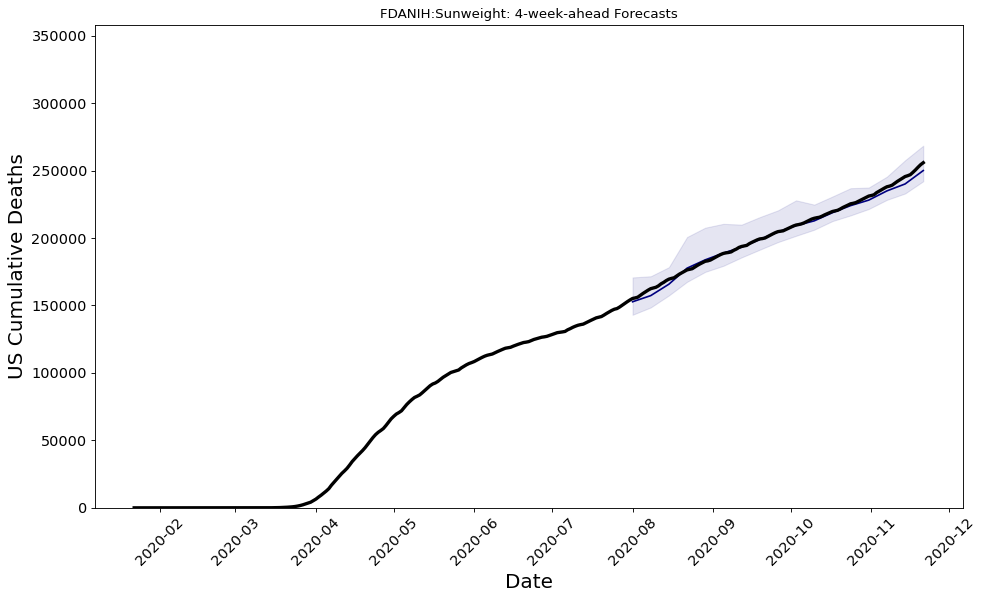

In [45]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sunweight')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:255: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:255: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:255: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))


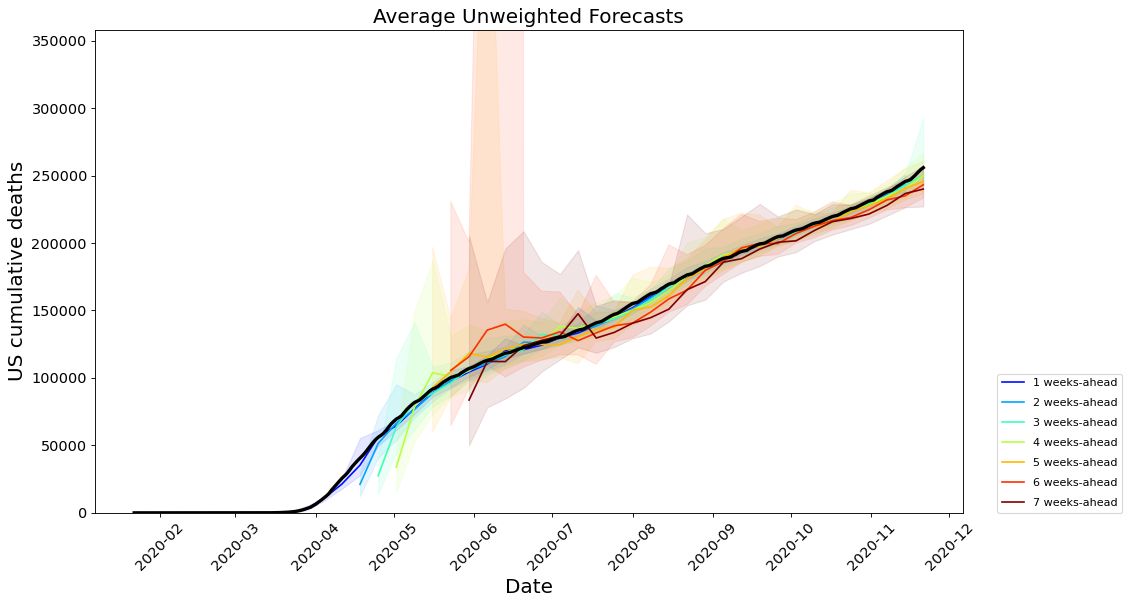

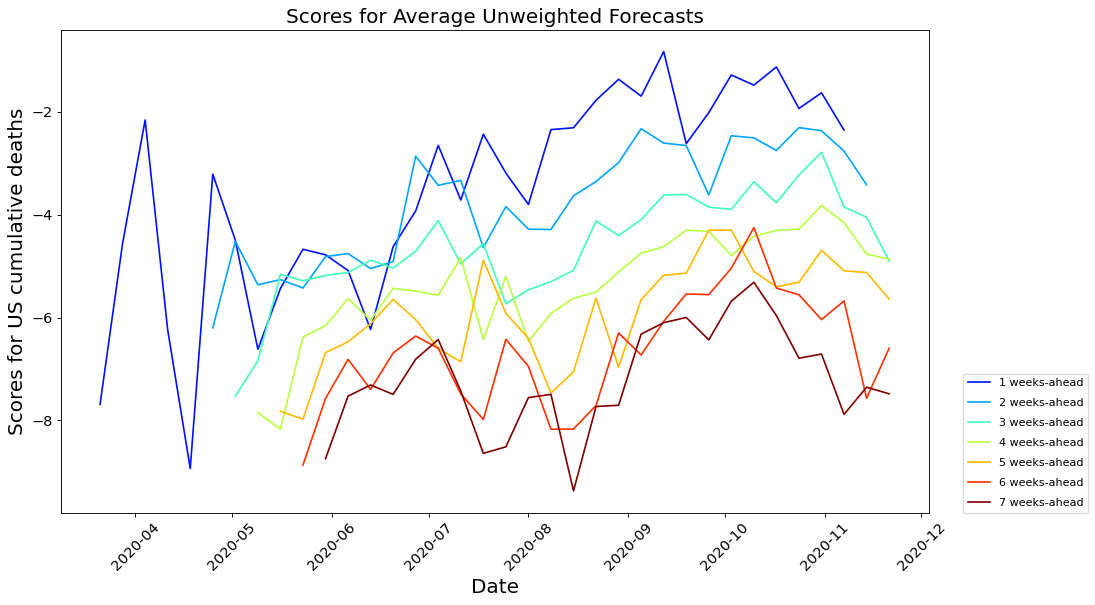

In [46]:
S19.plotlongitudinalUNWEIGHTED(US_deaths,ScoreboardDeaths,'Deaths',7)

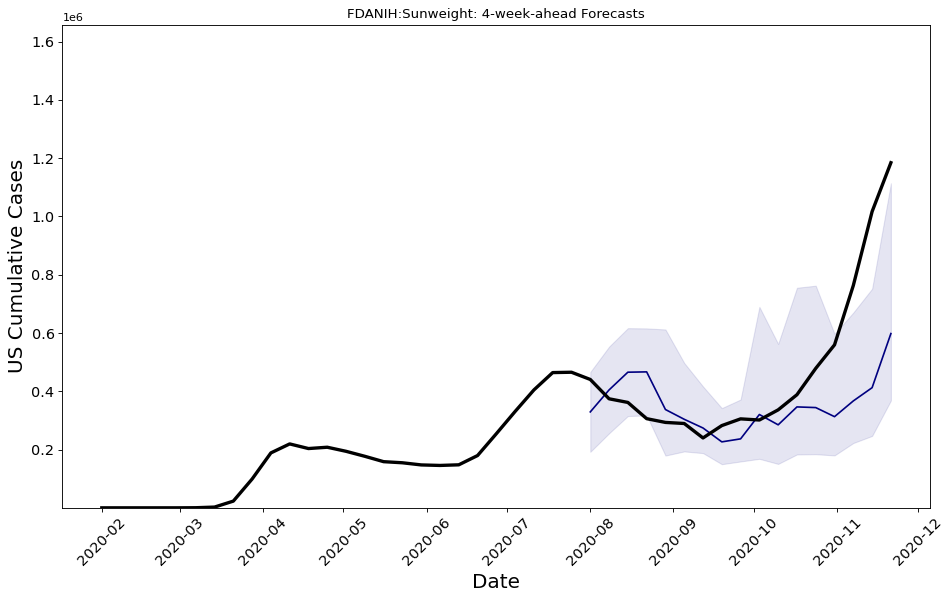

In [47]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sunweight')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:255: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:255: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:255: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:255: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scoresplots.py:255: RuntimeWarning: Mean of empty slice
  as_index=False)[['score']].agg(lambda x: np.nanmean(x)))
/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19

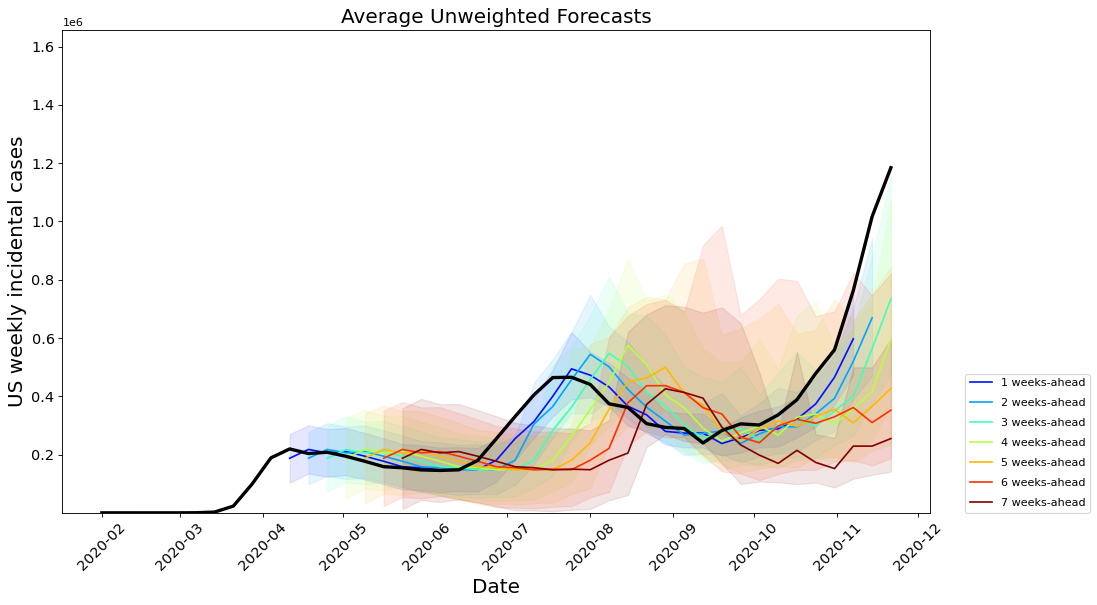

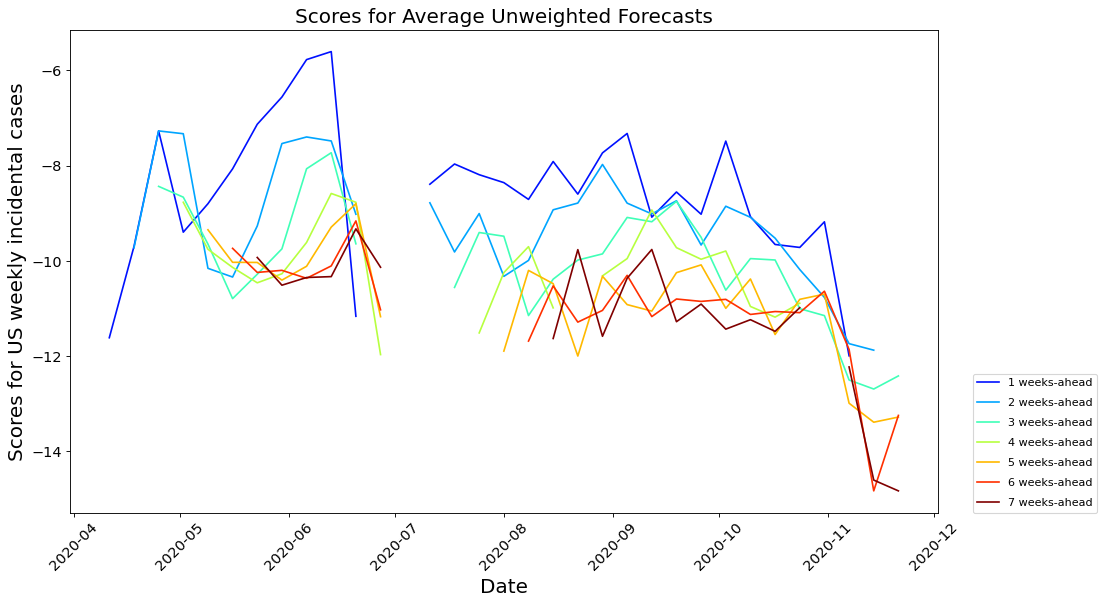

In [48]:
S19.plotlongitudinalUNWEIGHTED(US_cases,ScoreboardCases,'Cases',7)

# SCORE-WEIGHTED FORECASTING

## Deaths

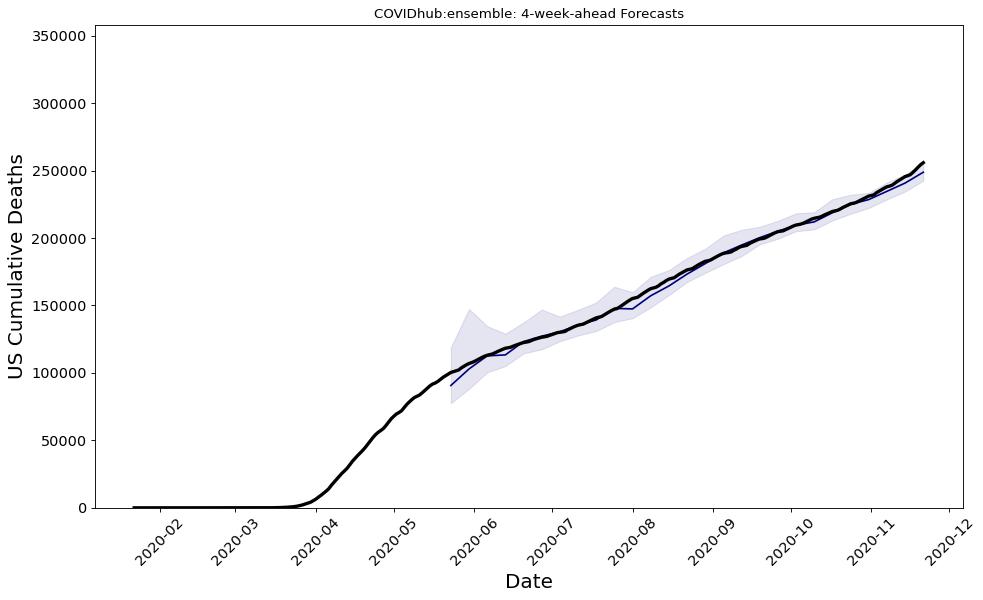

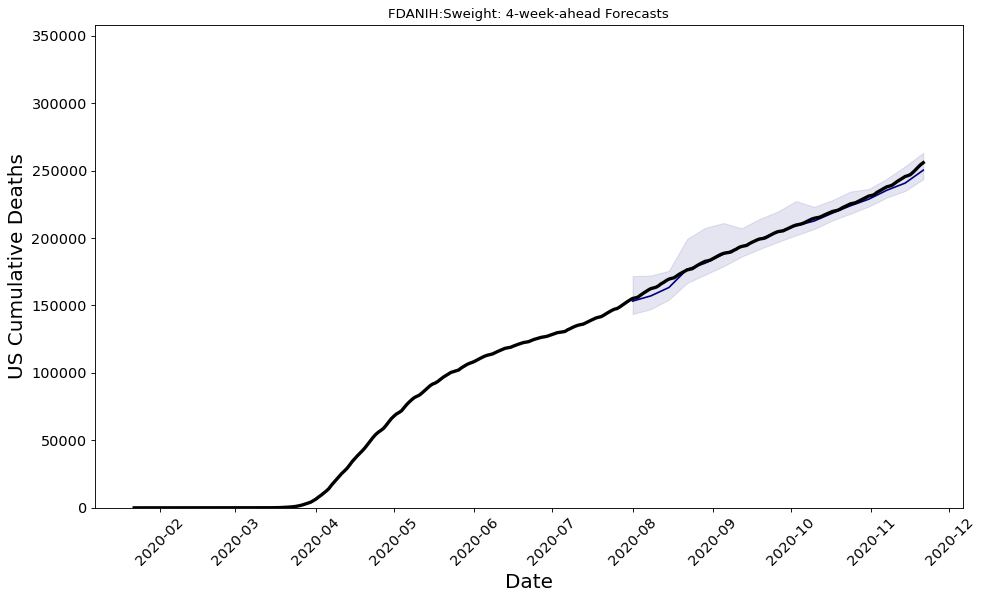

In [49]:
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_deaths,ScoreboardDeaths,'Deaths',4,'FDANIH:Sweight')

## Cases

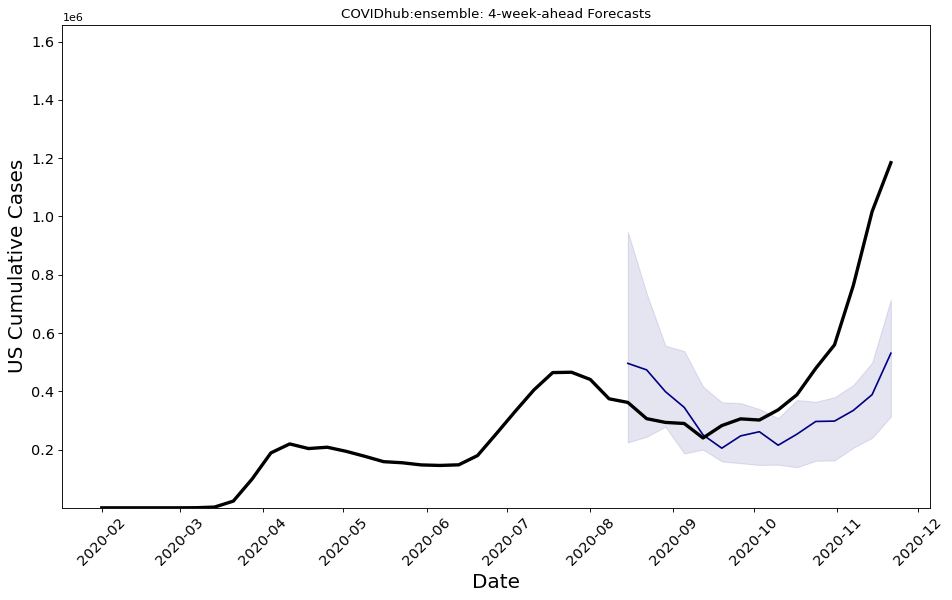

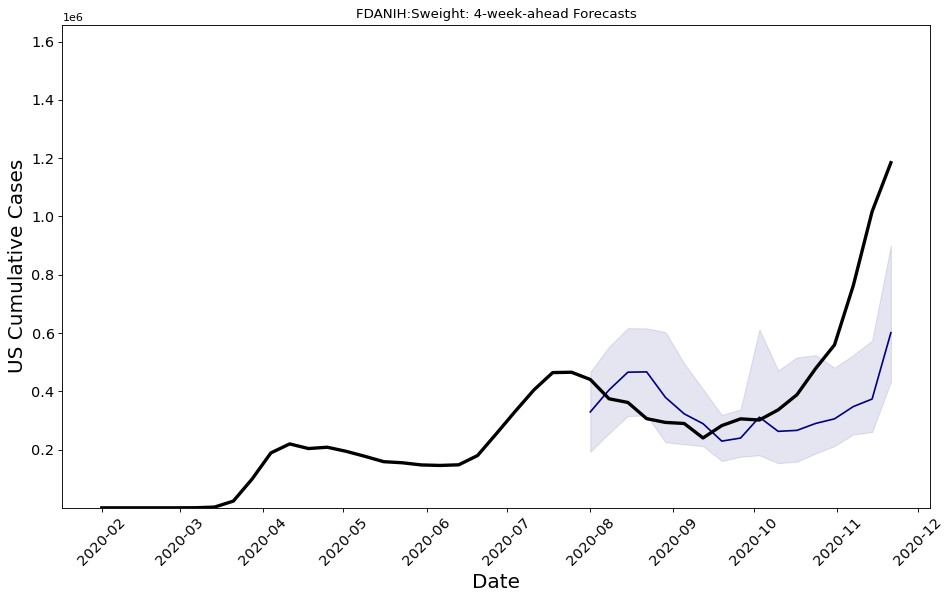

In [50]:
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'COVIDhub:ensemble')
S19.plotlongitudinal(US_cases,ScoreboardCases,'Cases',4,'FDANIH:Sweight')

# ANALYSIS OF SCORES

## Plots by date forecast made

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:389: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


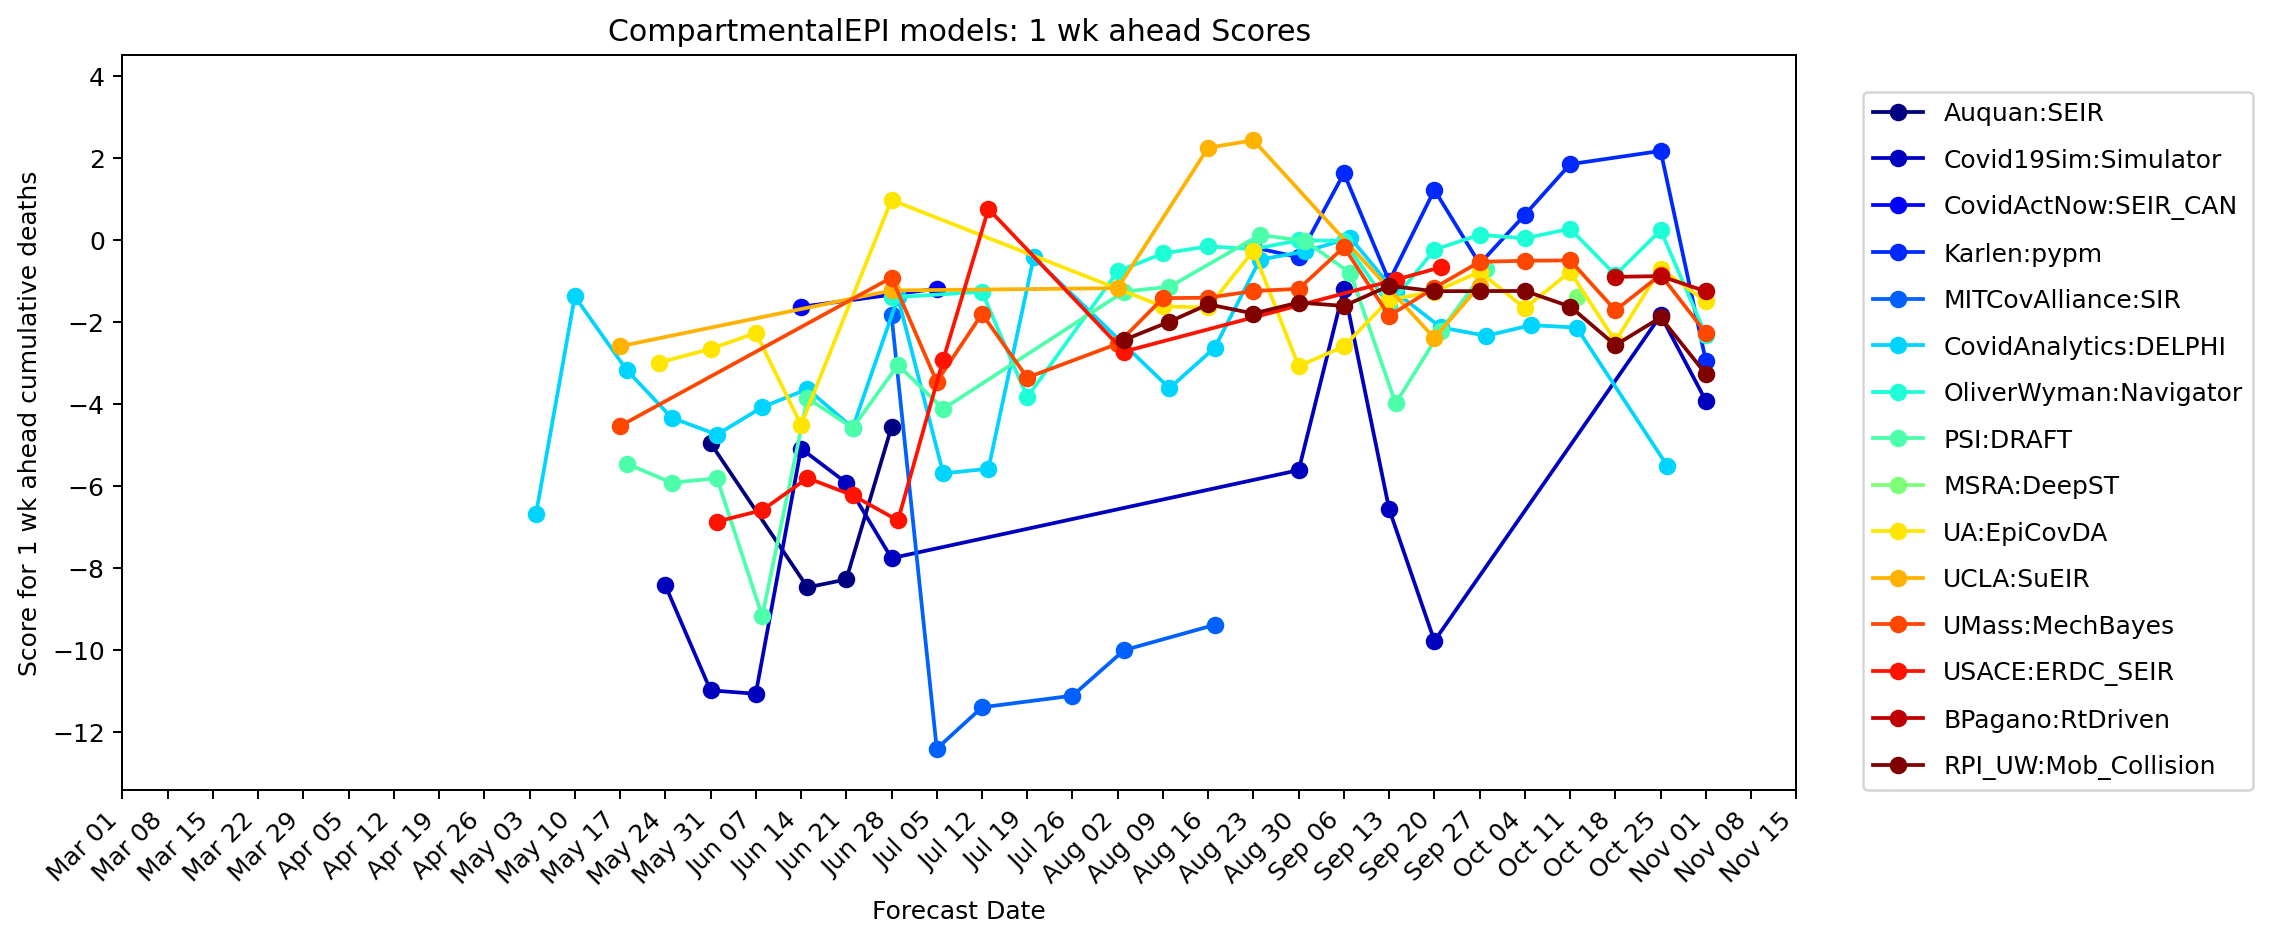

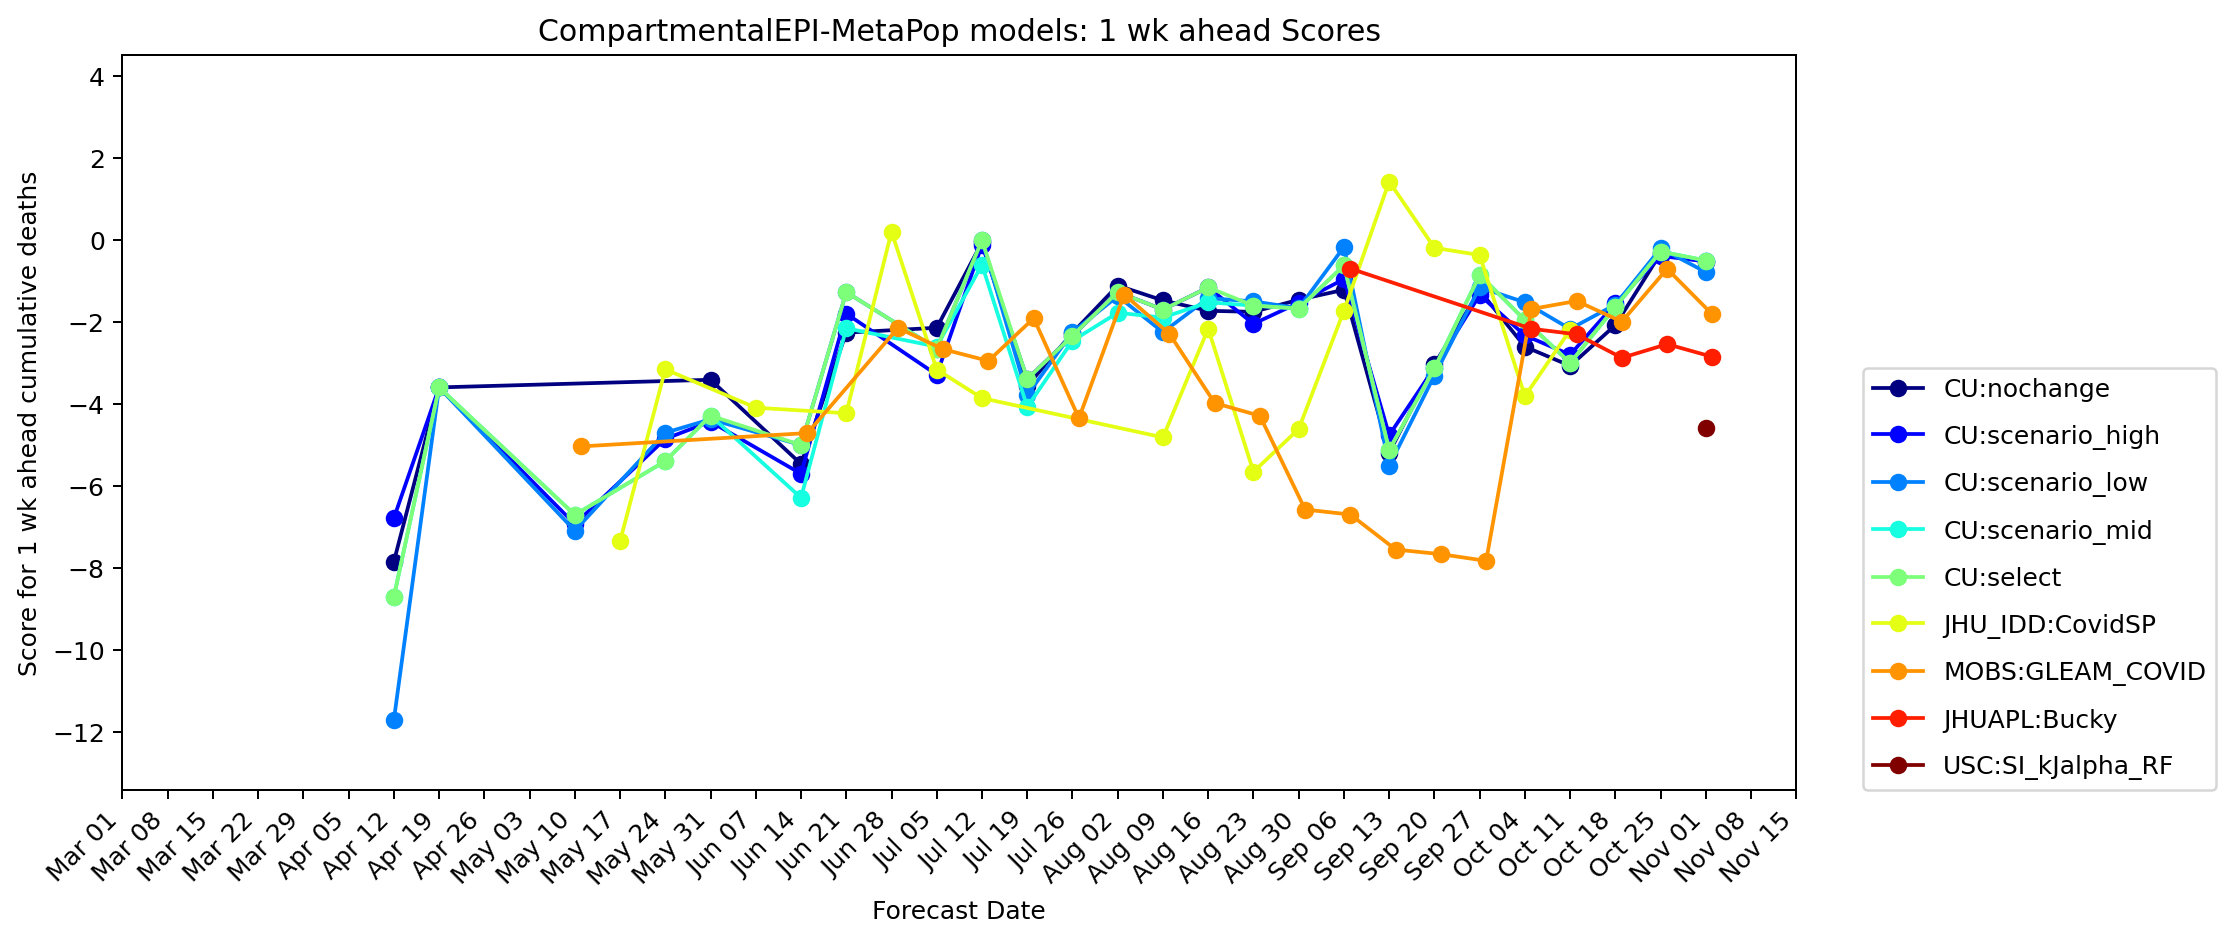

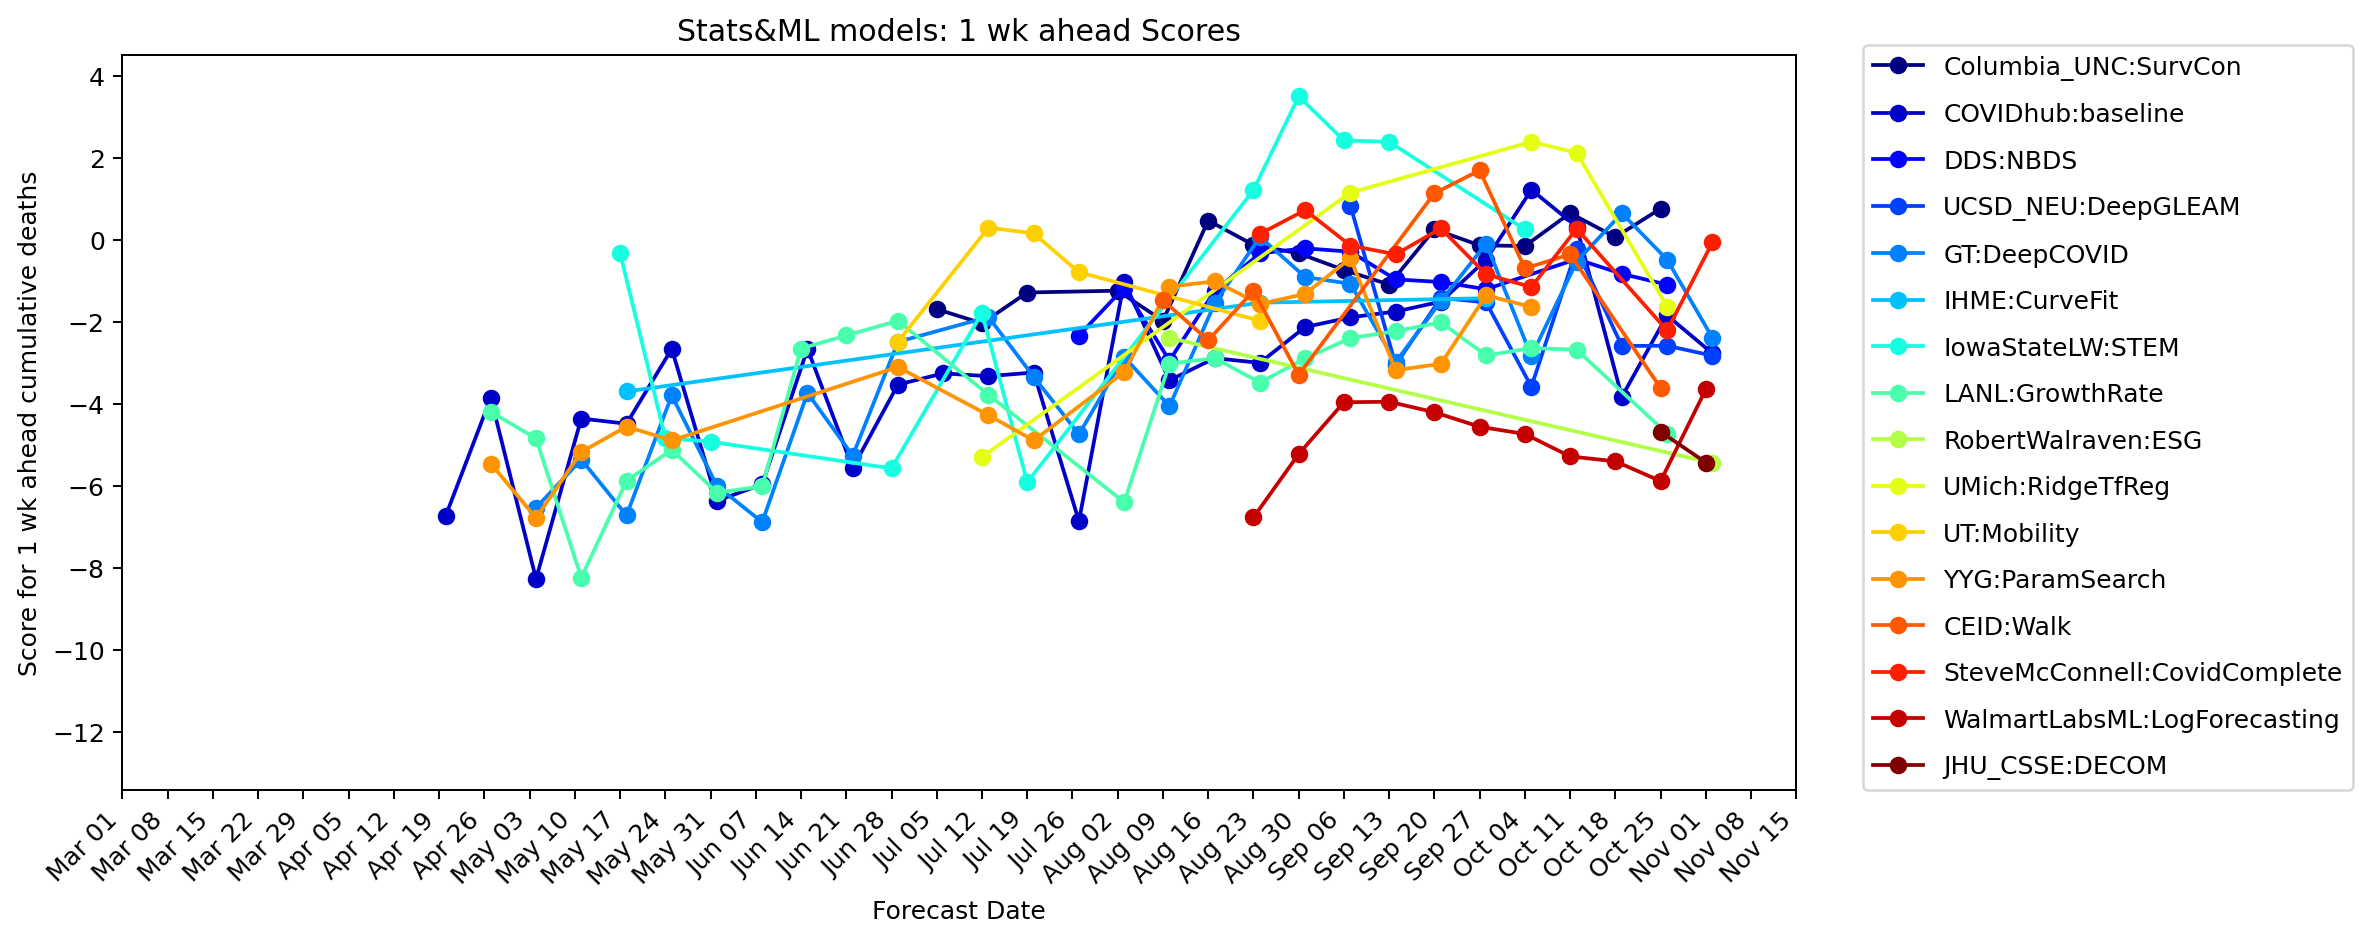

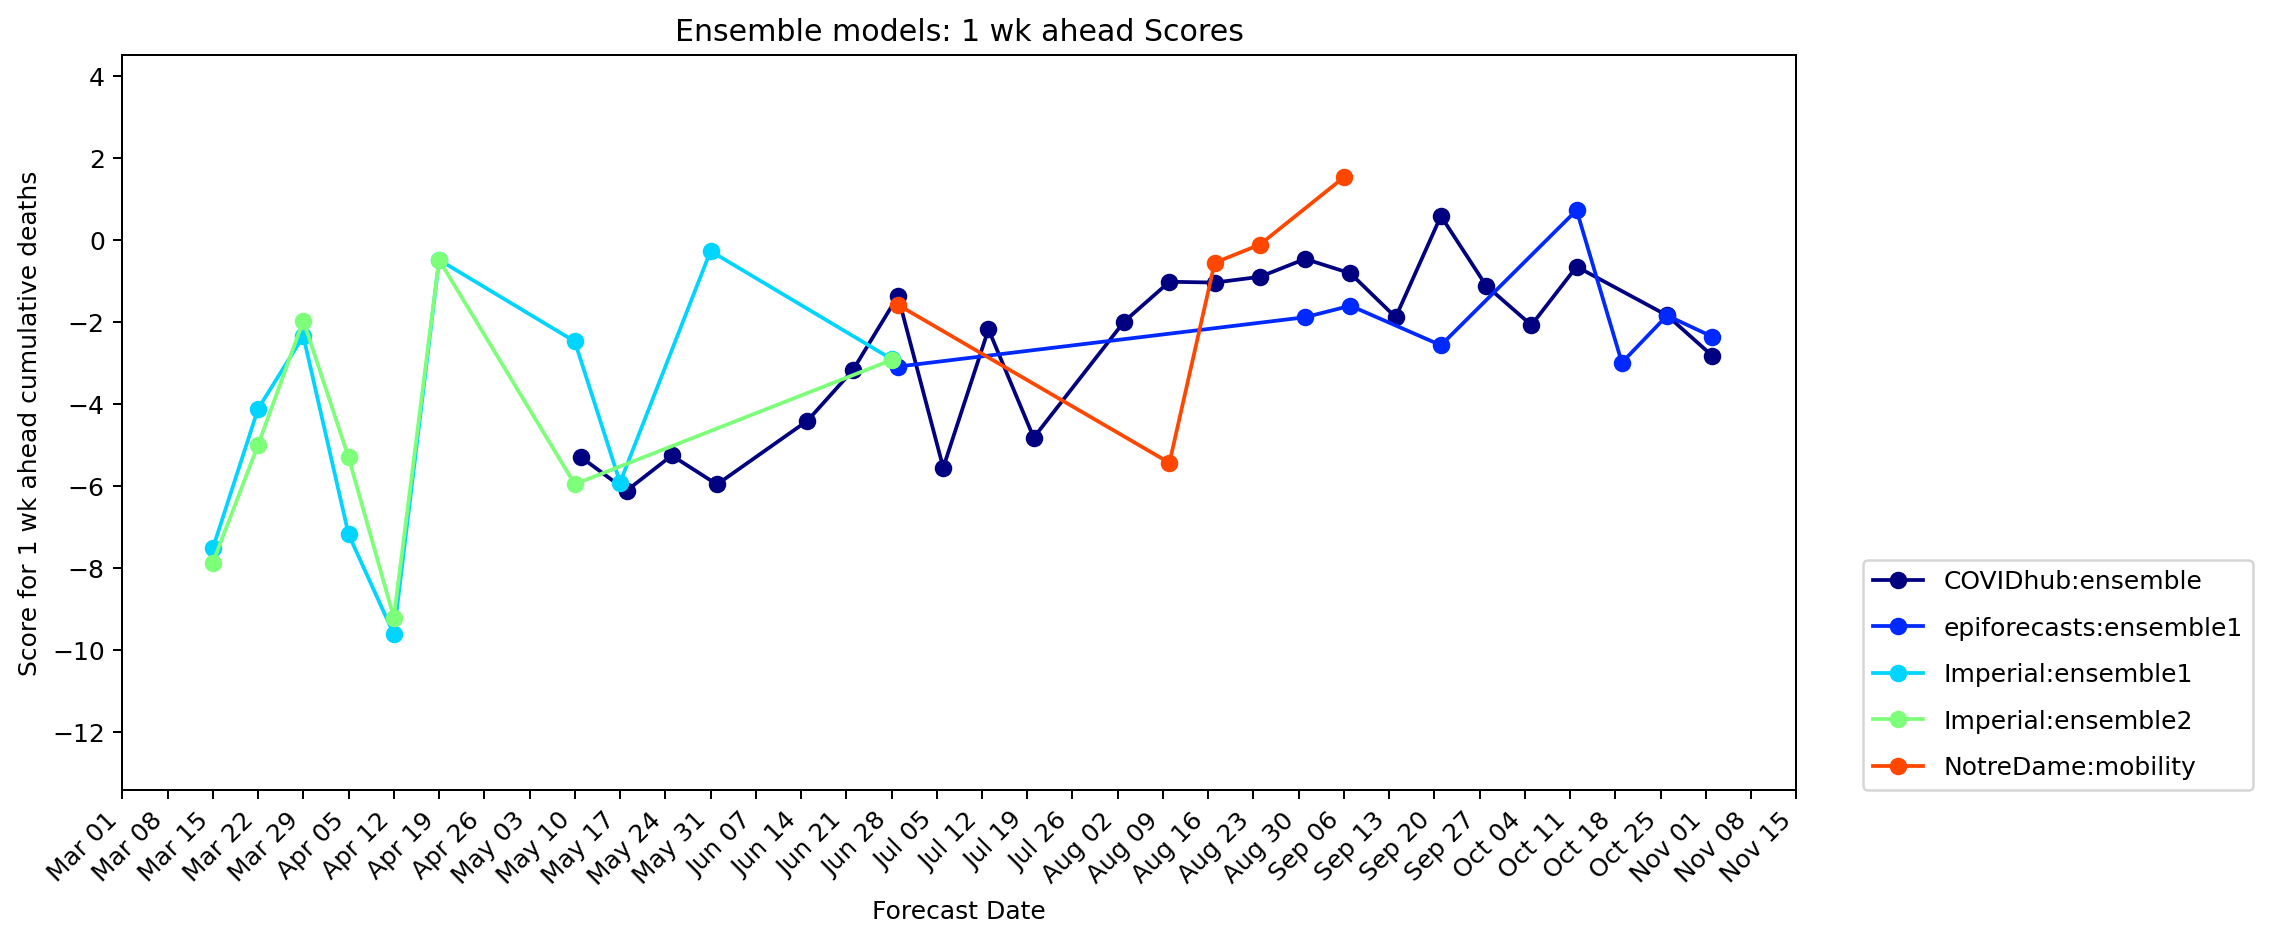

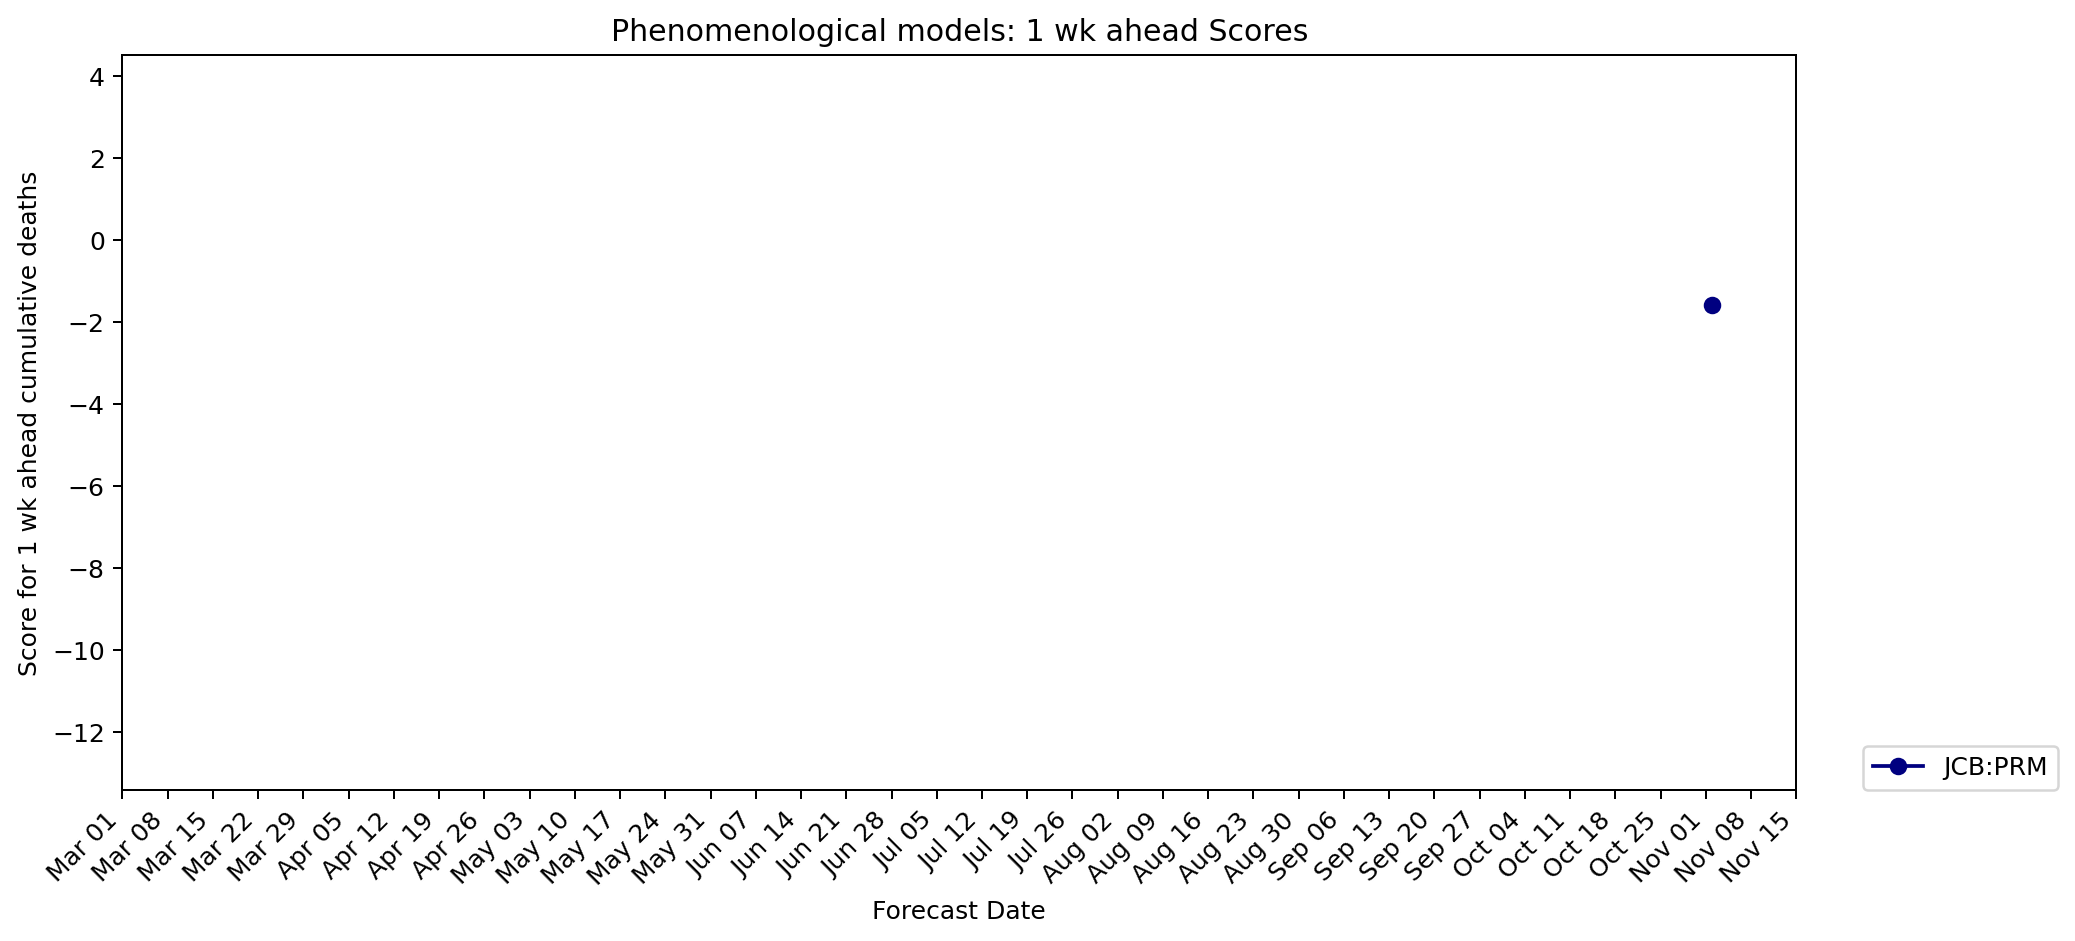

In [51]:
S19.plotgroupsFD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 1, 'Death')

/home/osman.yogurtcu/Documents/Projects/Python/Scoreboard/Scoreboard19/scores.py:389: RuntimeWarning: Mean of empty slice
  MerdfPRED['nanmean'] = MerdfPRED.apply(lambda row : np.nanmean(row['score']), axis = 1)
/home/osman.yogurtcu/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
No handles with labels found to put in legend.


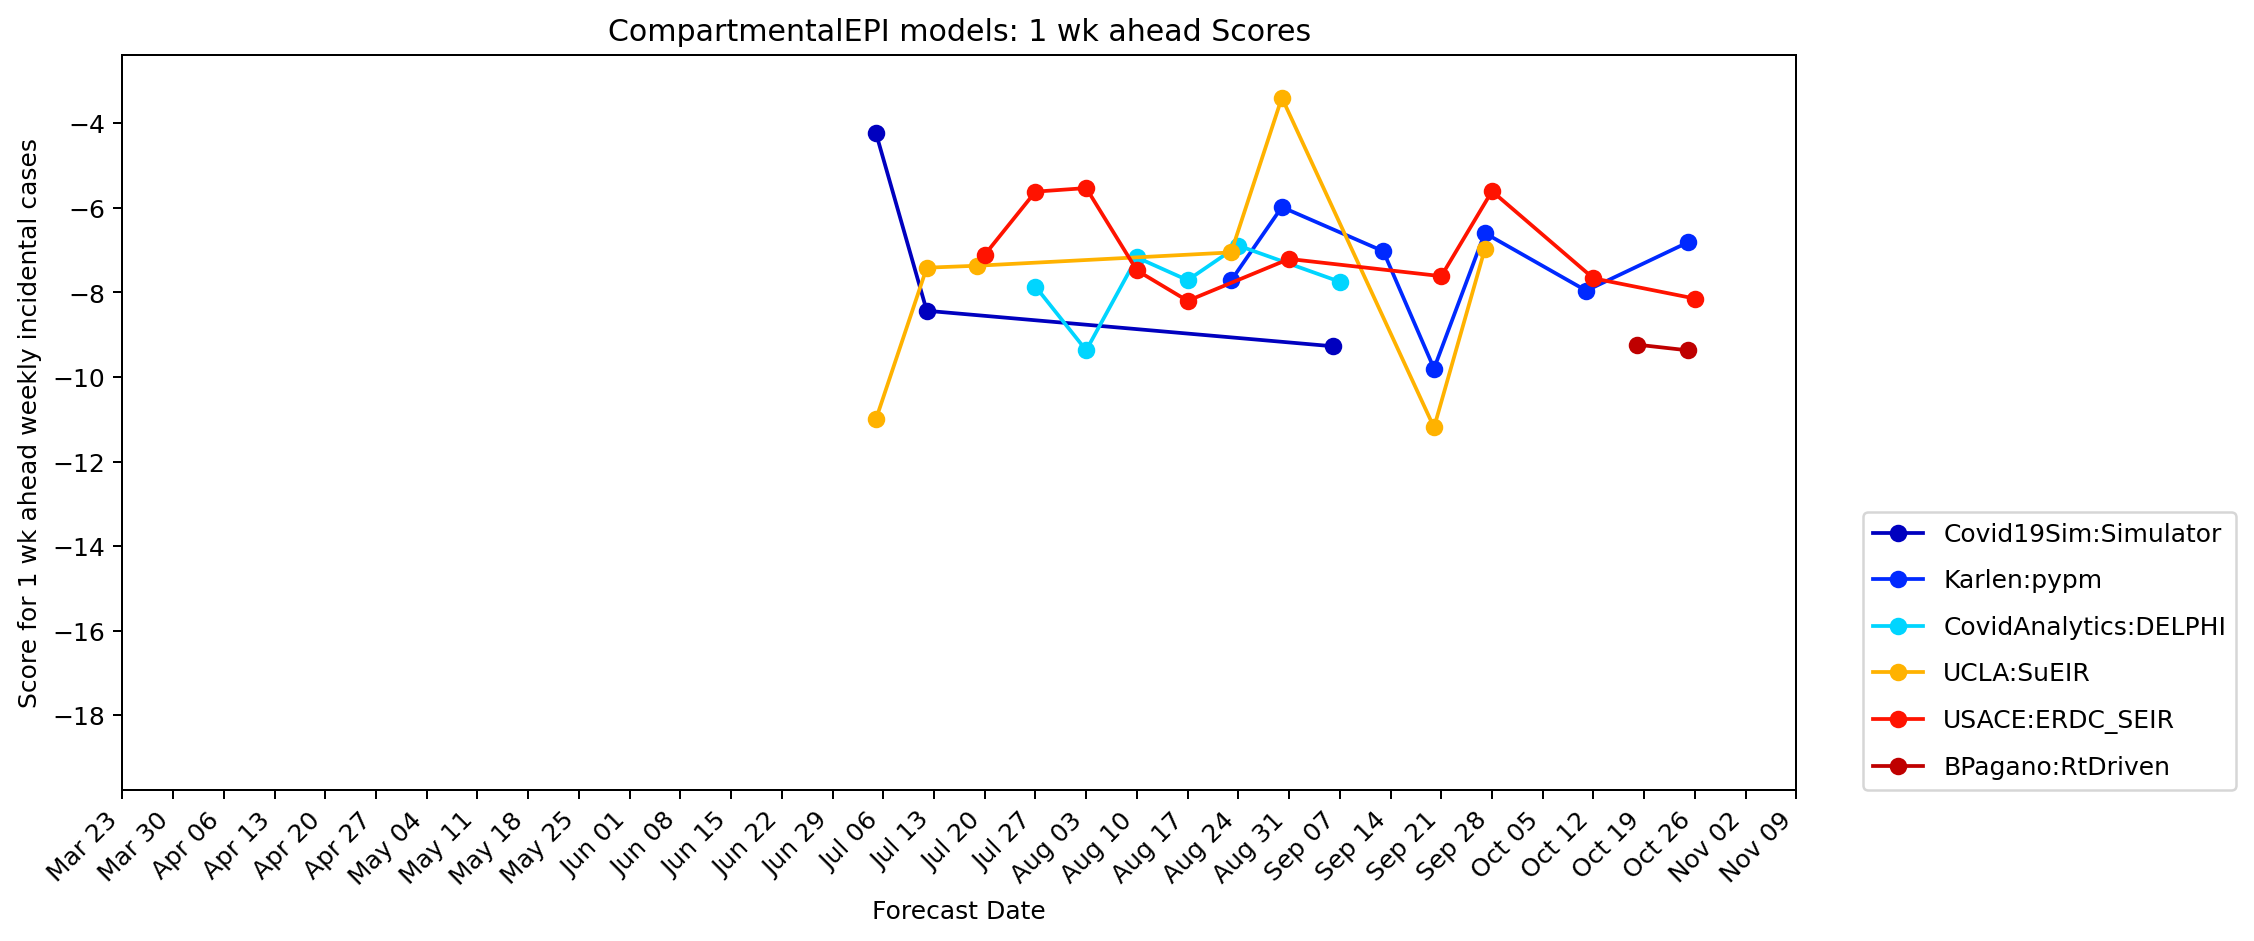

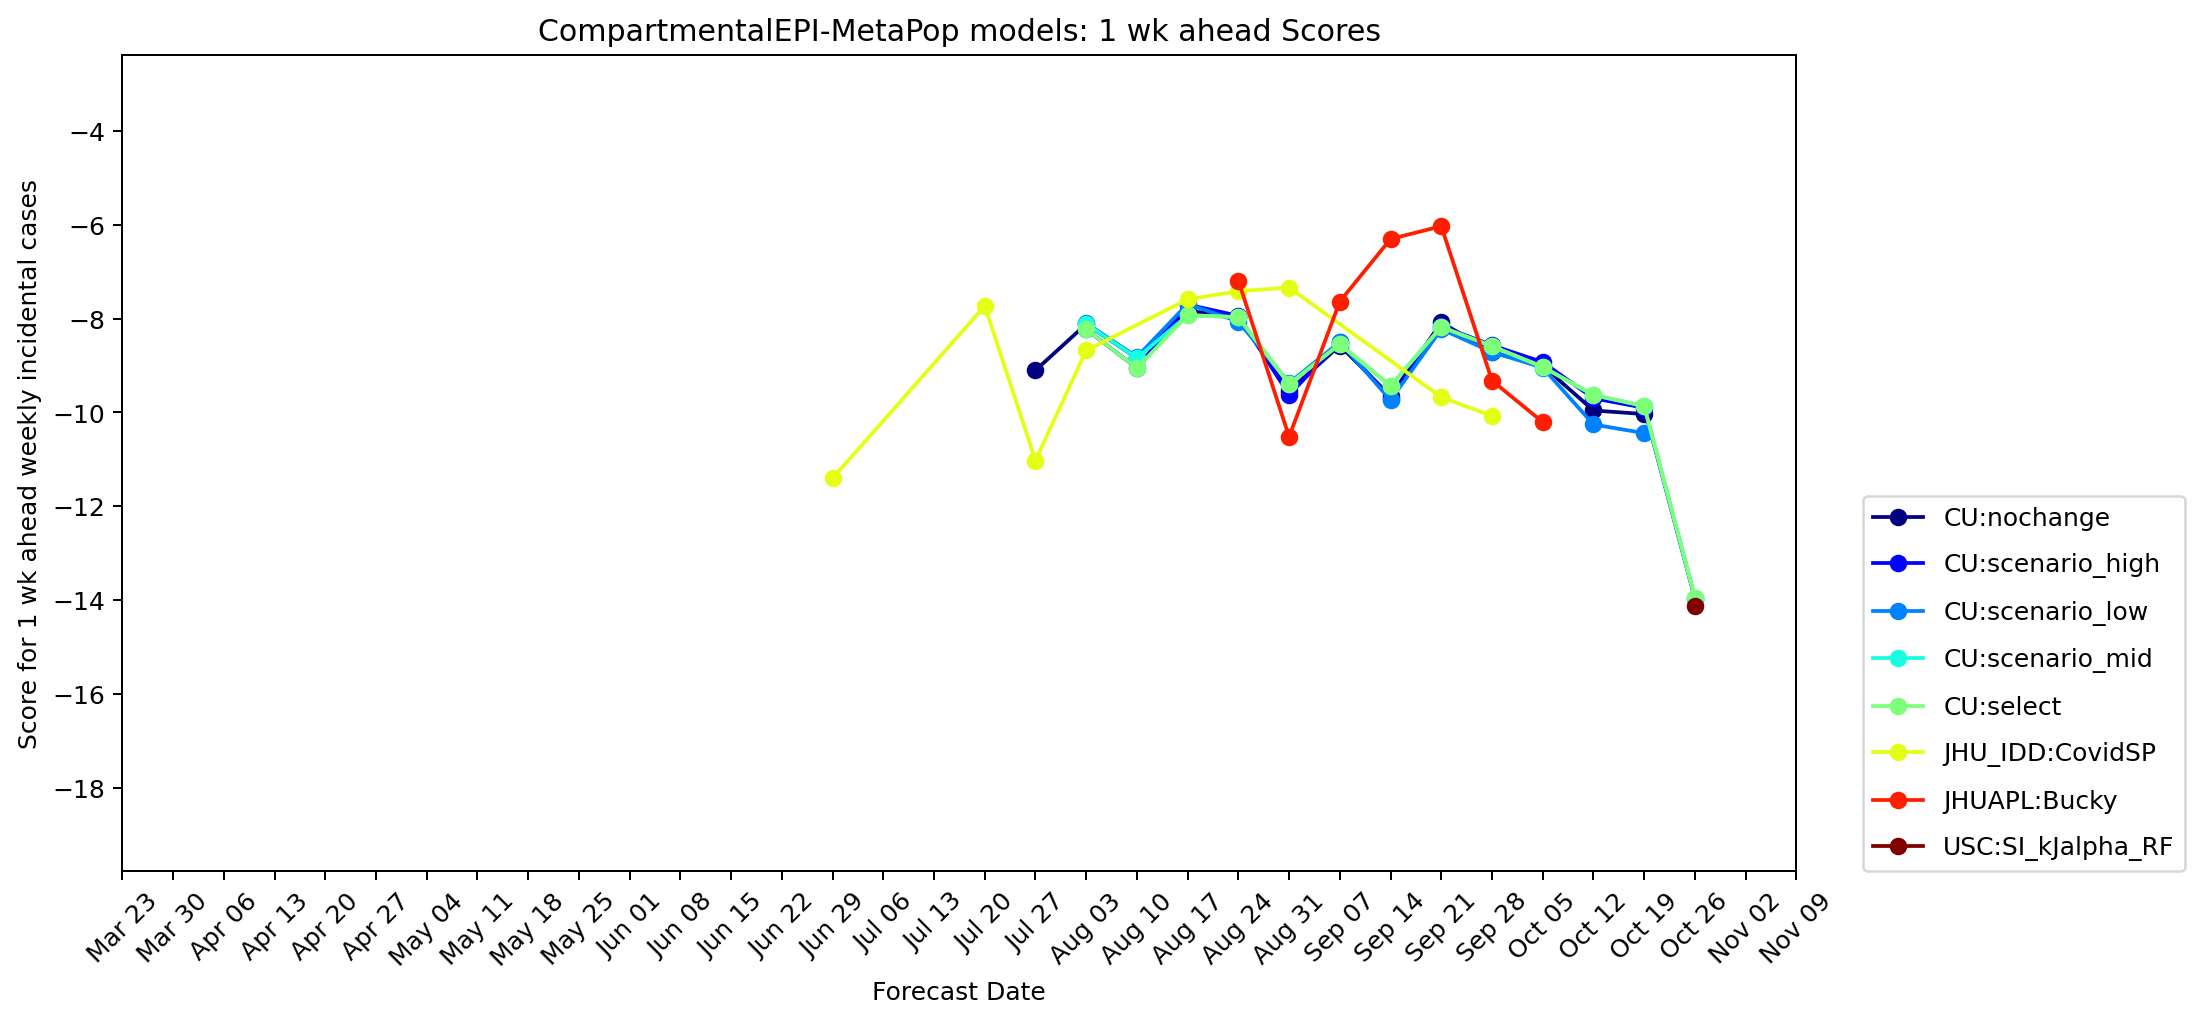

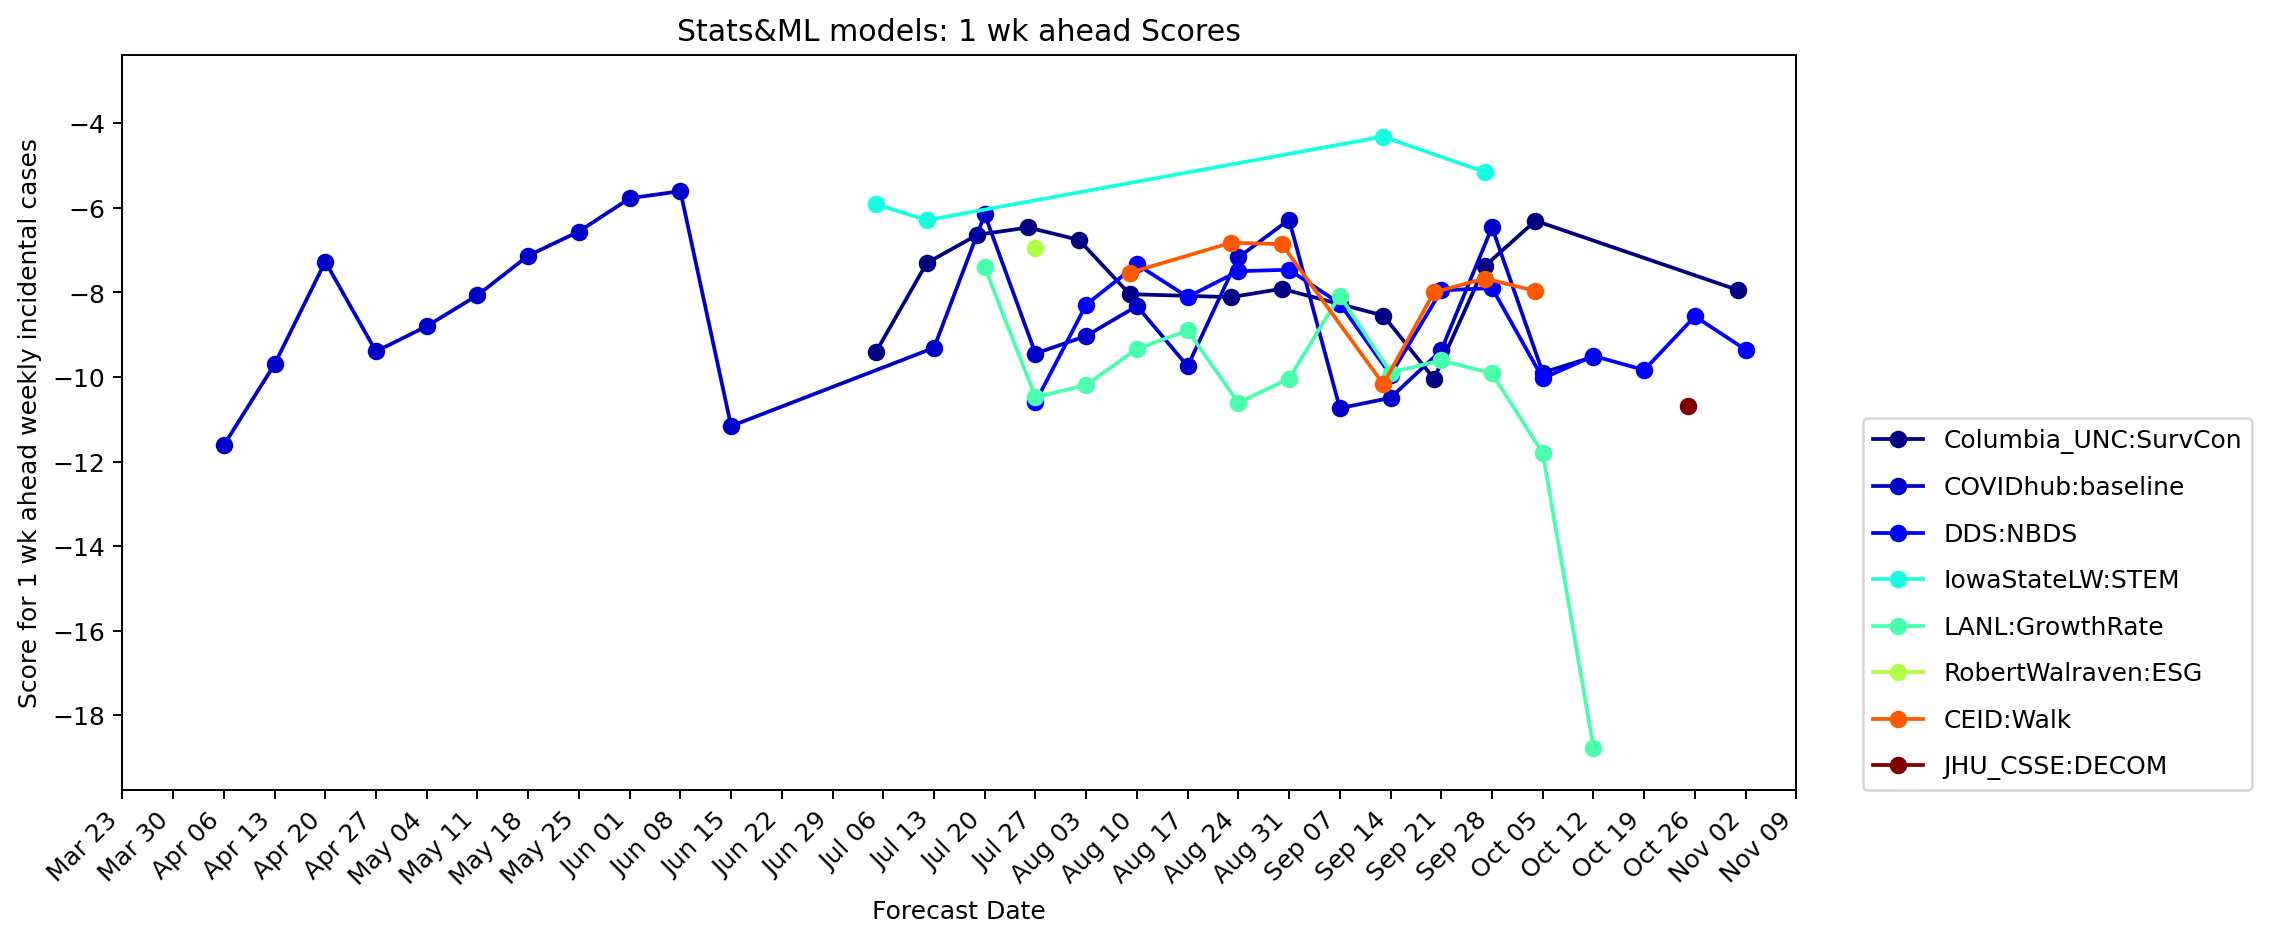

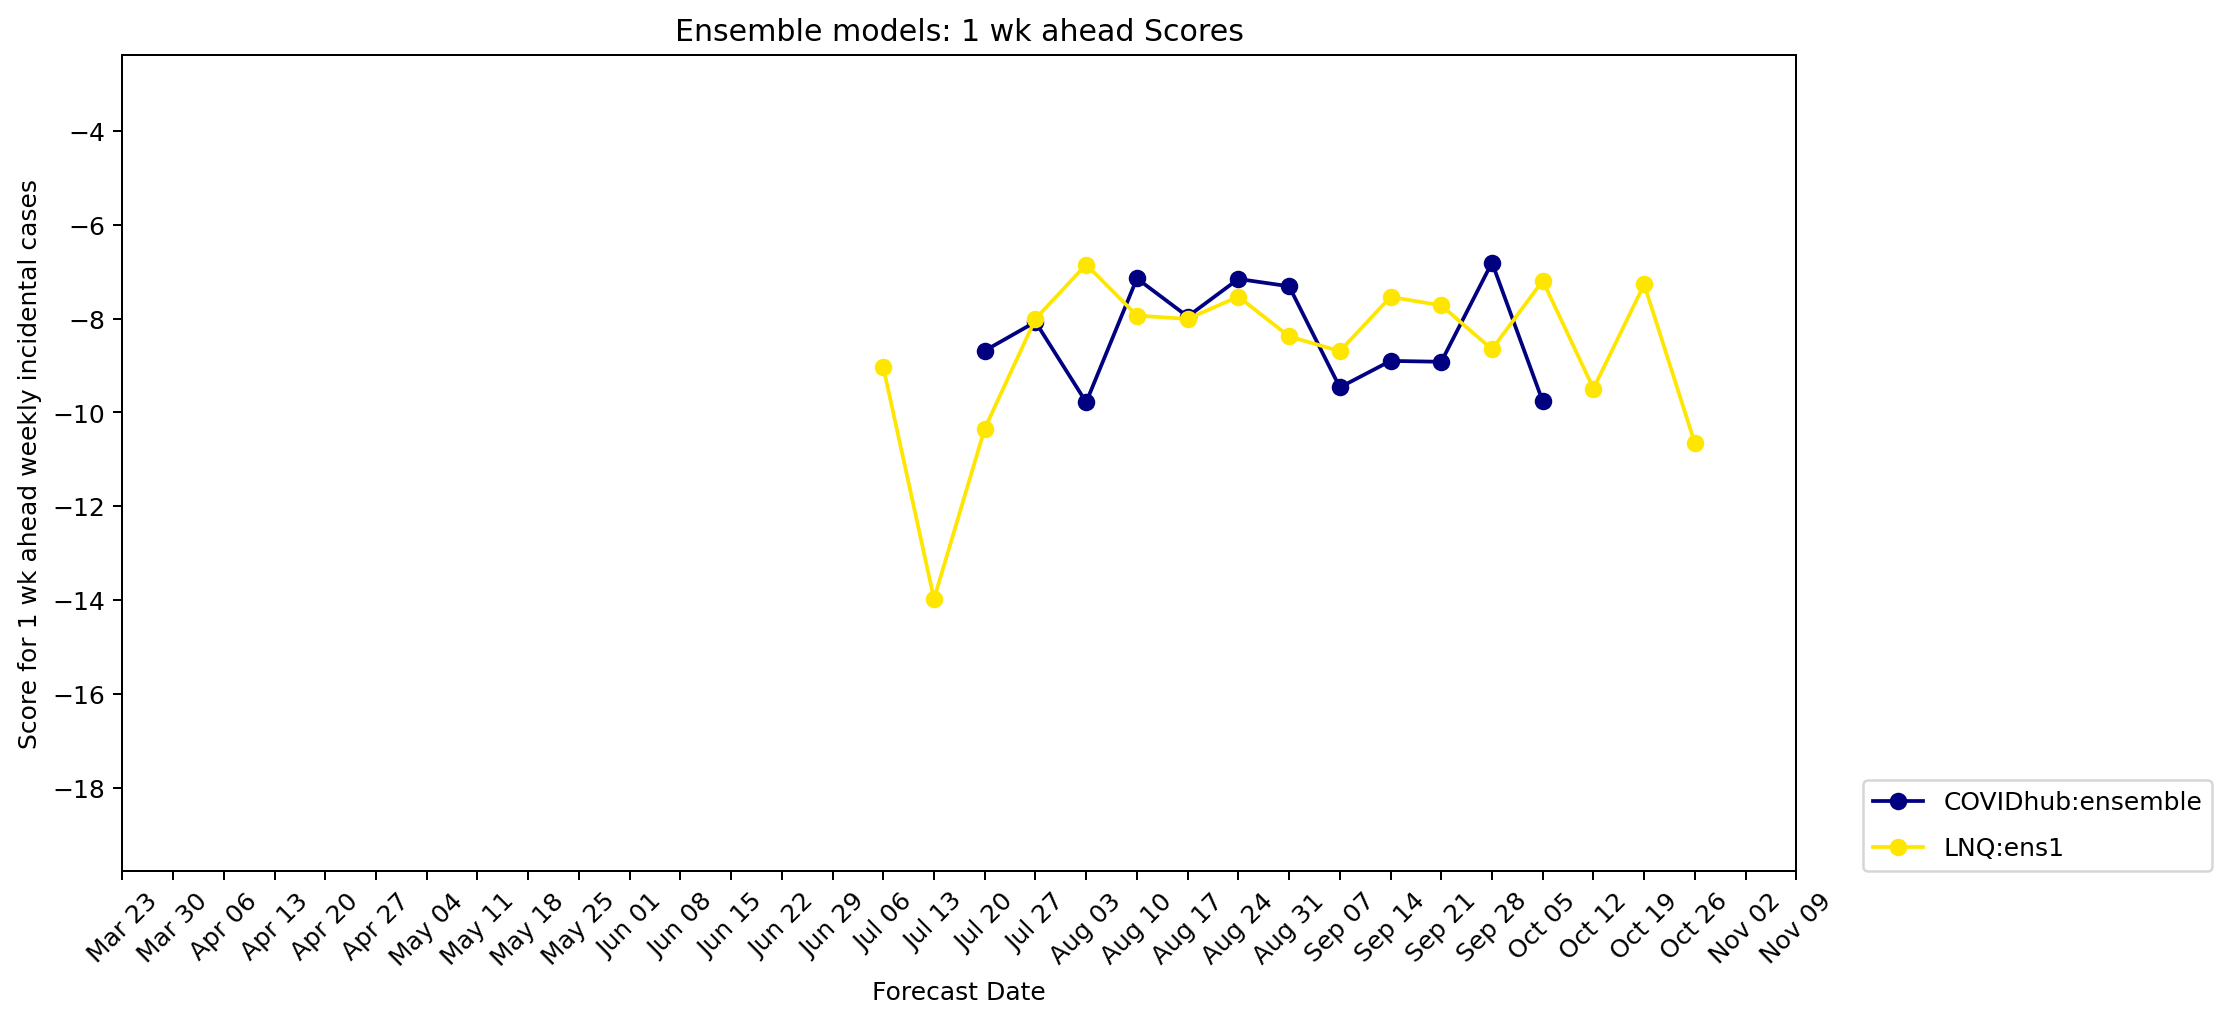

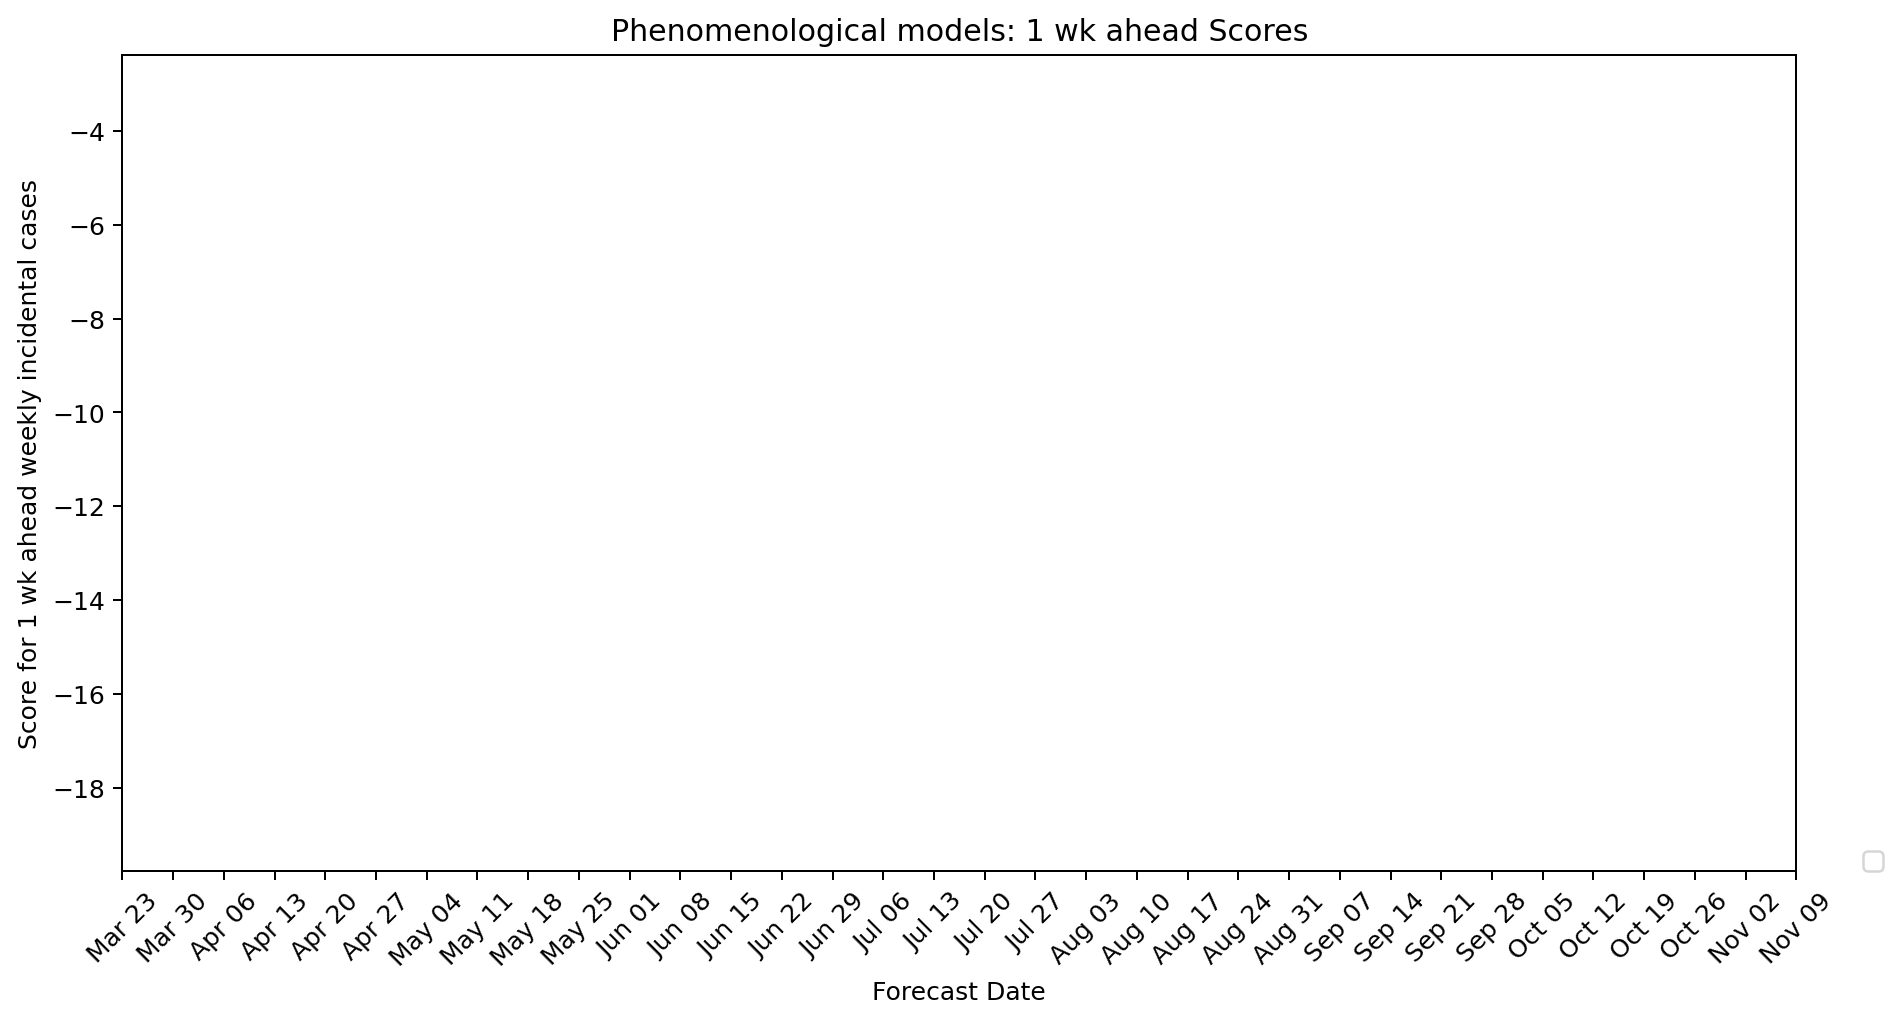

In [52]:
S19.plotgroupsFD(ScoreboardCases, modeltypesCases, figuresdirectory, 1, 'Case')

## Plots by target end date

In [ ]:
S19.plotgroupsTD(ScoreboardDeaths, modeltypesDeaths, figuresdirectory, 'Death')

In [ ]:
S19.plotgroupsTD(ScoreboardCases, modeltypesCases, figuresdirectory, 'Case')

### ADD TO GITHUB

In [ ]:
os.chdir(gitdir)
# #!git remote set-url origin https://github.com/ONYLAB/Scoreboard.git
# #!git config credential.helper store
#!git stash
#!git pull --rebase origin master
!git add --all
!git commit -am “Update”
!git push -u origin master
os.chdir(mypwd[0])